In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Electricity.csv')
df

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
0,2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
1,2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2,2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
3,2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
4,2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30
...,...,...,...,...,...,...,...,...,...,...
46006,2024-03-31 19:00:00,5618,5902,1398,505,2294,1012,620,6,65
46007,2024-03-31 20:00:00,6107,6205,1395,671,2389,1037,645,0,66
46008,2024-03-31 21:00:00,5991,5855,1395,868,2201,705,621,0,66
46009,2024-03-31 22:00:00,5527,5726,1393,908,2088,648,622,0,66


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   DateTime       46011 non-null  object
 1   Consumption    46011 non-null  int64 
 2   Production     46011 non-null  int64 
 3   Nuclear        46011 non-null  int64 
 4   Wind           46011 non-null  int64 
 5   Hydroelectric  46011 non-null  int64 
 6   Oil and Gas    46011 non-null  int64 
 7   Coal           46011 non-null  int64 
 8   Solar          46011 non-null  int64 
 9   Biomass        46011 non-null  int64 
dtypes: int64(9), object(1)
memory usage: 3.5+ MB


In [4]:
df['DateTime']=pd.to_datetime(df['DateTime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46011 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46011 non-null  datetime64[ns]
 1   Consumption    46011 non-null  int64         
 2   Production     46011 non-null  int64         
 3   Nuclear        46011 non-null  int64         
 4   Wind           46011 non-null  int64         
 5   Hydroelectric  46011 non-null  int64         
 6   Oil and Gas    46011 non-null  int64         
 7   Coal           46011 non-null  int64         
 8   Solar          46011 non-null  int64         
 9   Biomass        46011 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.5 MB


In [6]:
df.isnull().sum()

DateTime         0
Consumption      0
Production       0
Nuclear          0
Wind             0
Hydroelectric    0
Oil and Gas      0
Coal             0
Solar            0
Biomass          0
dtype: int64

In [7]:
df.duplicated().sum()

4

In [8]:
df[df.duplicated()==True]

,DateTime,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
7180,2019-10-27 03:00:00,5196,4459,1373,74,725,719,1515,0,50
15917,2020-10-25 03:00:00,5220,5412,1418,1188,1098,594,1048,0,65
24822,2021-10-31 03:00:00,5341,5258,1415,141,934,1314,1393,0,58
33559,2022-10-30 03:00:00,4503,5269,1384,544,1289,924,1073,0,52


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46007 entries, 0 to 46010
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DateTime       46007 non-null  datetime64[ns]
 1   Consumption    46007 non-null  int64         
 2   Production     46007 non-null  int64         
 3   Nuclear        46007 non-null  int64         
 4   Wind           46007 non-null  int64         
 5   Hydroelectric  46007 non-null  int64         
 6   Oil and Gas    46007 non-null  int64         
 7   Coal           46007 non-null  int64         
 8   Solar          46007 non-null  int64         
 9   Biomass        46007 non-null  int64         
dtypes: datetime64[ns](1), int64(9)
memory usage: 3.9 MB


In [11]:
print('Starting_Date',df['DateTime'].min())
print('Ending_Date',df['DateTime'].max())


Starting_Date 2019-01-01 00:00:00
Ending_Date 2024-03-31 23:00:00


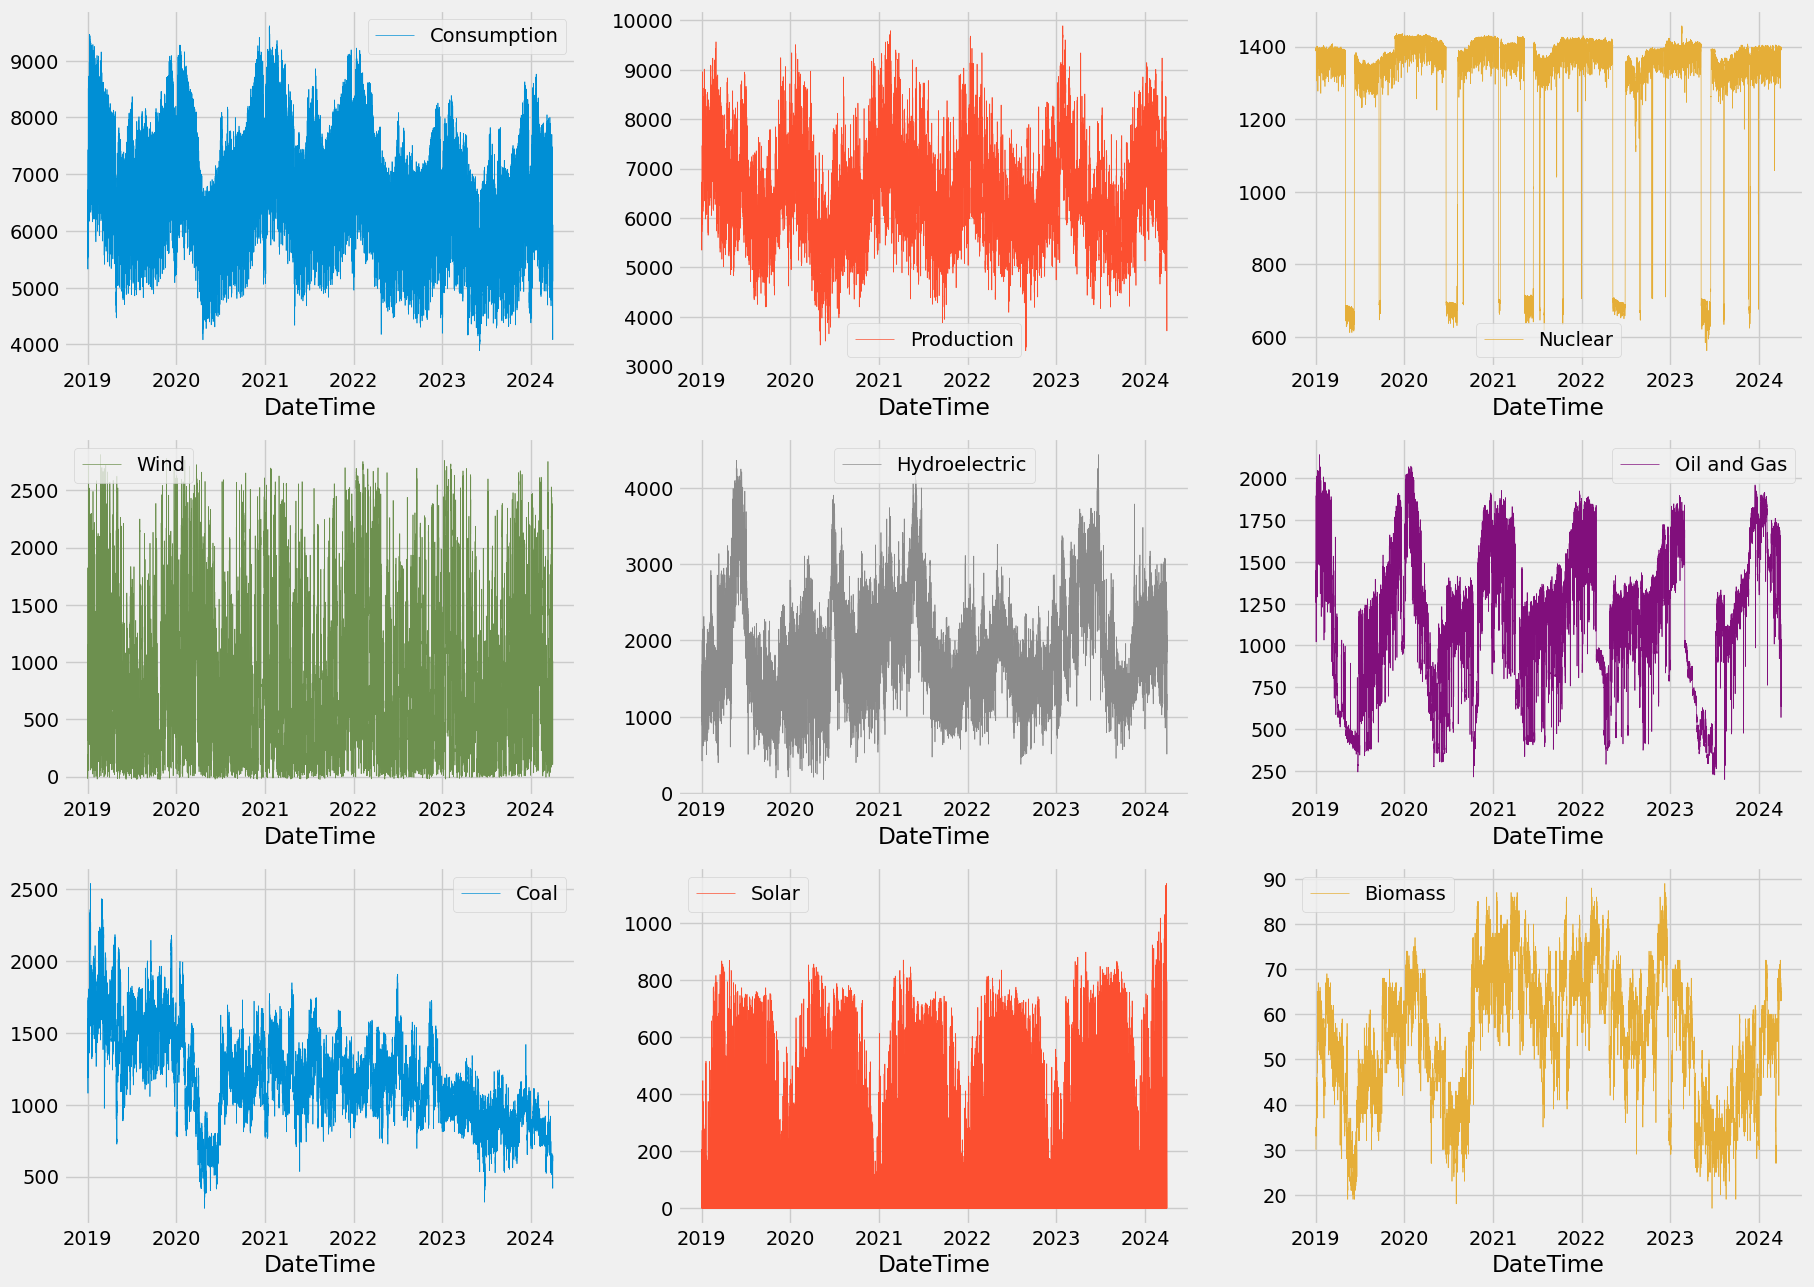

In [12]:
plt.style.use("fivethirtyeight")

df2=df.copy('Deep')
df2=df2.set_index('DateTime')

df2.plot(subplots=True,
        linewidth=0.5,
        layout=(3, 3),
        figsize=(20, 15),
        sharex=False,
        sharey=False)
plt.show()

<p style="font-size:140%; color: #c71585; font-family: Comic Sans MS; line-height: 1.4;">
1) Peak consumption is reducing in 2023 and 2024
2) There is a seasonality in production and consumption.
3) Coal-Use of coal for the production of electricity is decreasing year on year
4) Solar- Use of solar for electricity production is highest in 2024.

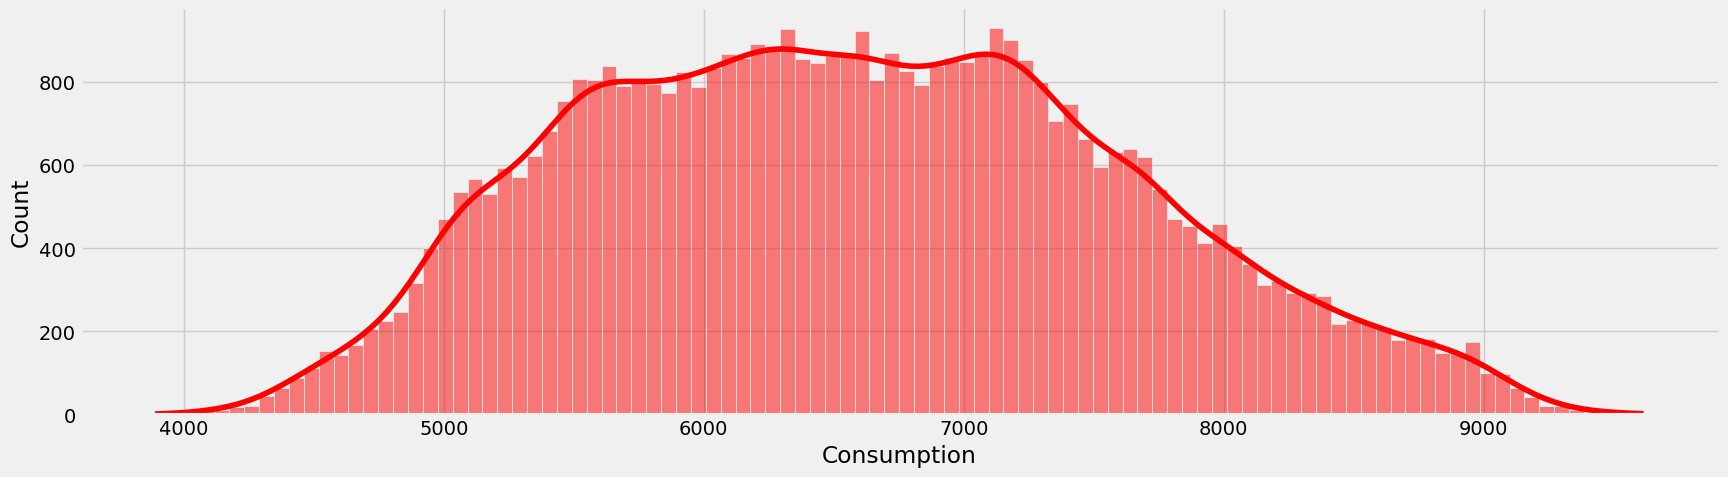

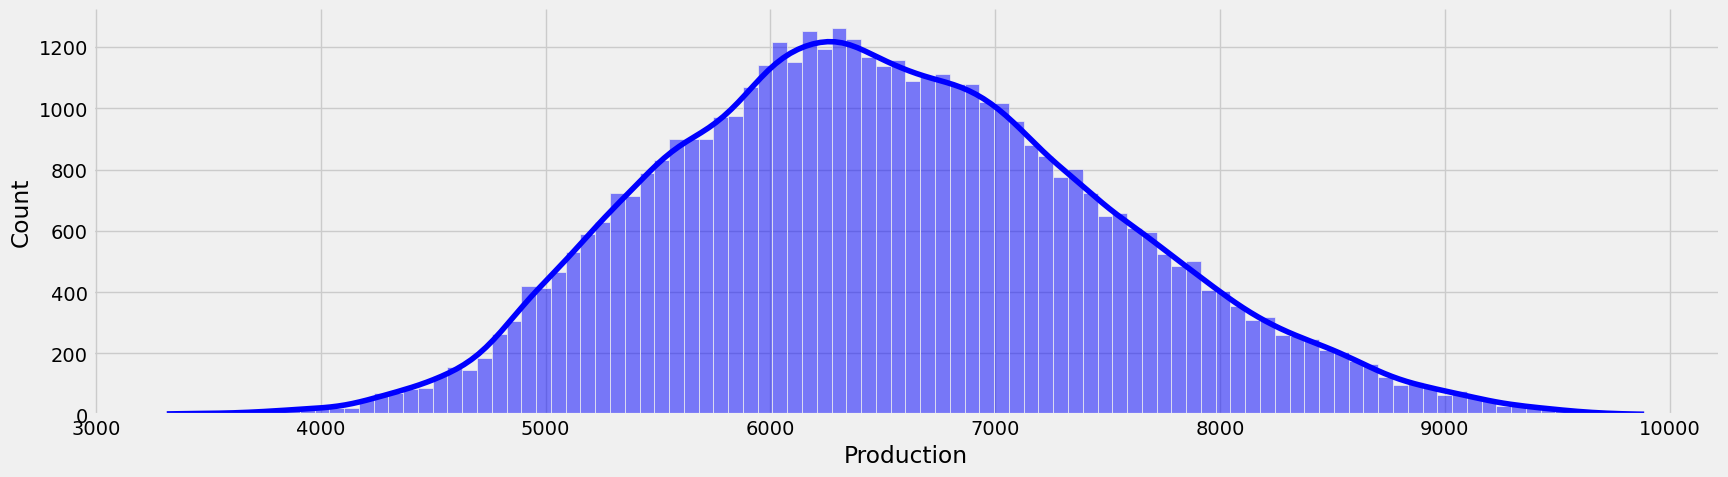

In [13]:
ax1=sns.displot(data=df,x="Consumption",kind='hist',bins=100,color='red',height=5,aspect=3.5,kde=True)
ax2=sns.displot(data=df,x="Production",kind='hist',bins=100,color='blue',height=5,aspect=3.5,kde=True)

In [14]:
df_comp=df[['DateTime','Consumption','Production']]
df_comp

,DateTime,Consumption,Production
0,2019-01-01 00:00:00,6352,6527
1,2019-01-01 01:00:00,6116,5701
2,2019-01-01 02:00:00,5873,5676
3,2019-01-01 03:00:00,5682,5603
4,2019-01-01 04:00:00,5557,5454
...,...,...,...
46006,2024-03-31 19:00:00,5618,5902
46007,2024-03-31 20:00:00,6107,6205
46008,2024-03-31 21:00:00,5991,5855
46009,2024-03-31 22:00:00,5527,5726


<Axes: xlabel='DateTime'>

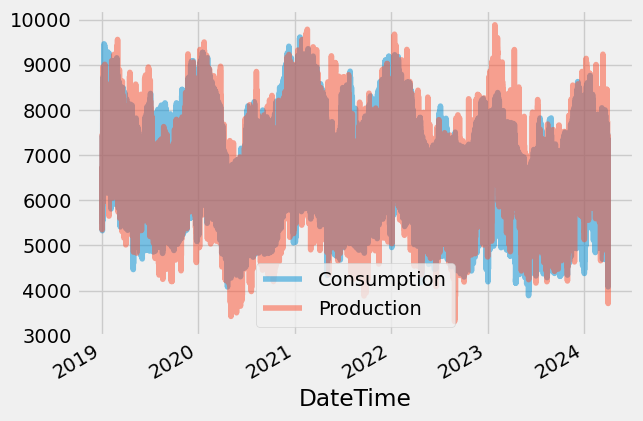

In [15]:
df_comp.plot(x='DateTime',alpha=0.5)

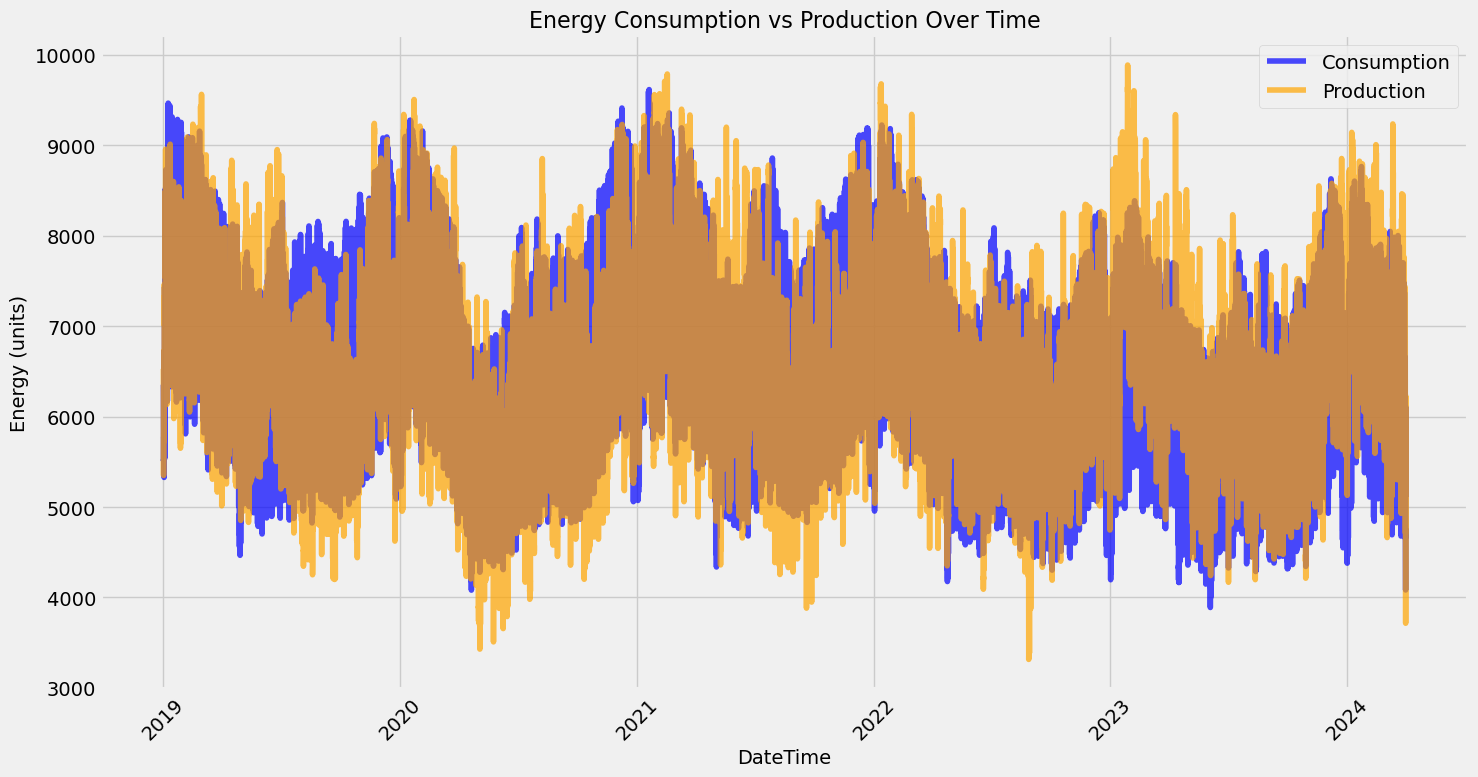

In [44]:
import matplotlib.pyplot as plt

# Set the plot style
plt.style.use('fivethirtyeight')

# Create the plot
plt.figure(figsize=(15, 8))  # Set figure size

# Plotting consumption and production
plt.plot(df_comp['DateTime'], df_comp['Consumption'], label='Consumption', alpha=0.7, color='blue')
plt.plot(df_comp['DateTime'], df_comp['Production'], label='Production', alpha=0.7, color='orange')

# Adding titles and labels
plt.title('Energy Consumption vs Production Over Time', fontsize=16)
plt.xlabel('DateTime', fontsize=14)
plt.ylabel('Energy (units)', fontsize=14)

# Adding a legend
plt.legend()

# Improve date formatting on x-axis if necessary
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show grid for easier interpretation
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


<Axes: xlabel='DateTime'>

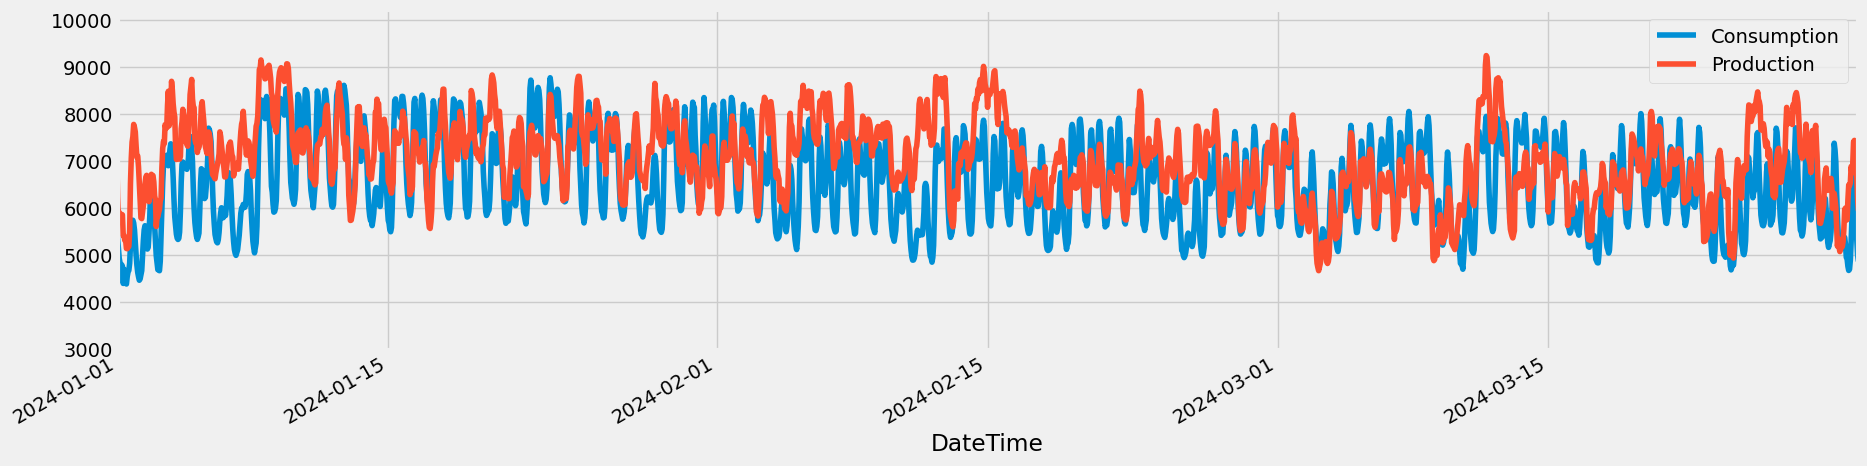

In [19]:
df_comp2=df_comp.copy("Deep")
df_comp2.set_index('DateTime')
df_comp2.plot(x='DateTime',xlim=['2024-01-01','2024-03-31'],kind='line',figsize=(20,5))

In [20]:
df_comp2.head(15)

,DateTime,Consumption,Production
0,2019-01-01 00:00:00,6352,6527
1,2019-01-01 01:00:00,6116,5701
2,2019-01-01 02:00:00,5873,5676
3,2019-01-01 03:00:00,5682,5603
4,2019-01-01 04:00:00,5557,5454
5,2019-01-01 05:00:00,5525,5385
6,2019-01-01 06:00:00,5513,5349
7,2019-01-01 07:00:00,5524,5547
8,2019-01-01 08:00:00,5510,5471
9,2019-01-01 09:00:00,5617,5545


In [22]:
df_comp3=df_comp2[['DateTime','Consumption']].copy('Deep')
df_comp3

,DateTime,Consumption
0,2019-01-01 00:00:00,6352
1,2019-01-01 01:00:00,6116
2,2019-01-01 02:00:00,5873
3,2019-01-01 03:00:00,5682
4,2019-01-01 04:00:00,5557
...,...,...
46006,2024-03-31 19:00:00,5618
46007,2024-03-31 20:00:00,6107
46008,2024-03-31 21:00:00,5991
46009,2024-03-31 22:00:00,5527


In [32]:
df_comp3=df_comp3.set_index(['DateTime'])

In [33]:
df_comp3['Consumption'].rolling(5).max().head(10)

DateTime
2019-01-01 00:00:00       NaN
2019-01-01 01:00:00       NaN
2019-01-01 02:00:00       NaN
2019-01-01 03:00:00       NaN
2019-01-01 04:00:00    6352.0
2019-01-01 05:00:00    6116.0
2019-01-01 06:00:00    5873.0
2019-01-01 07:00:00    5682.0
2019-01-01 08:00:00    5557.0
2019-01-01 09:00:00    5617.0
Name: Consumption, dtype: float64

In [34]:
df_comp3

,Consumption
DateTime,
2019-01-01 00:00:00,6352
2019-01-01 01:00:00,6116
2019-01-01 02:00:00,5873
2019-01-01 03:00:00,5682
2019-01-01 04:00:00,5557
...,...
2024-03-31 19:00:00,5618
2024-03-31 20:00:00,6107
2024-03-31 21:00:00,5991


In [36]:
count_date = df_comp3.groupby(df_comp3.index.date)['Consumption'].sum()

pw_clean = pd.DataFrame(count_date)
pw_clean['DateTime'] = pd.to_datetime(pw_clean.index) 
pw_clean = pw_clean.set_index('DateTime')
pw_clean.head()

,Consumption
DateTime,
2019-01-01,142984
2019-01-02,151729
2019-01-03,174098
2019-01-04,183242
2019-01-05,177114


In [38]:
pw_clean['Consumption:30 days rolling']=pw_clean['Consumption'].rolling(30).mean()
pw_clean.head(15)

,Consumption,Consumption:30 days rolling
DateTime,,
2019-01-01,142984,NaN
2019-01-02,151729,NaN
2019-01-03,174098,NaN
2019-01-04,183242,NaN
2019-01-05,177114,NaN
2019-01-06,168141,NaN
2019-01-07,189194,NaN
2019-01-08,201438,NaN
2019-01-09,200008,NaN


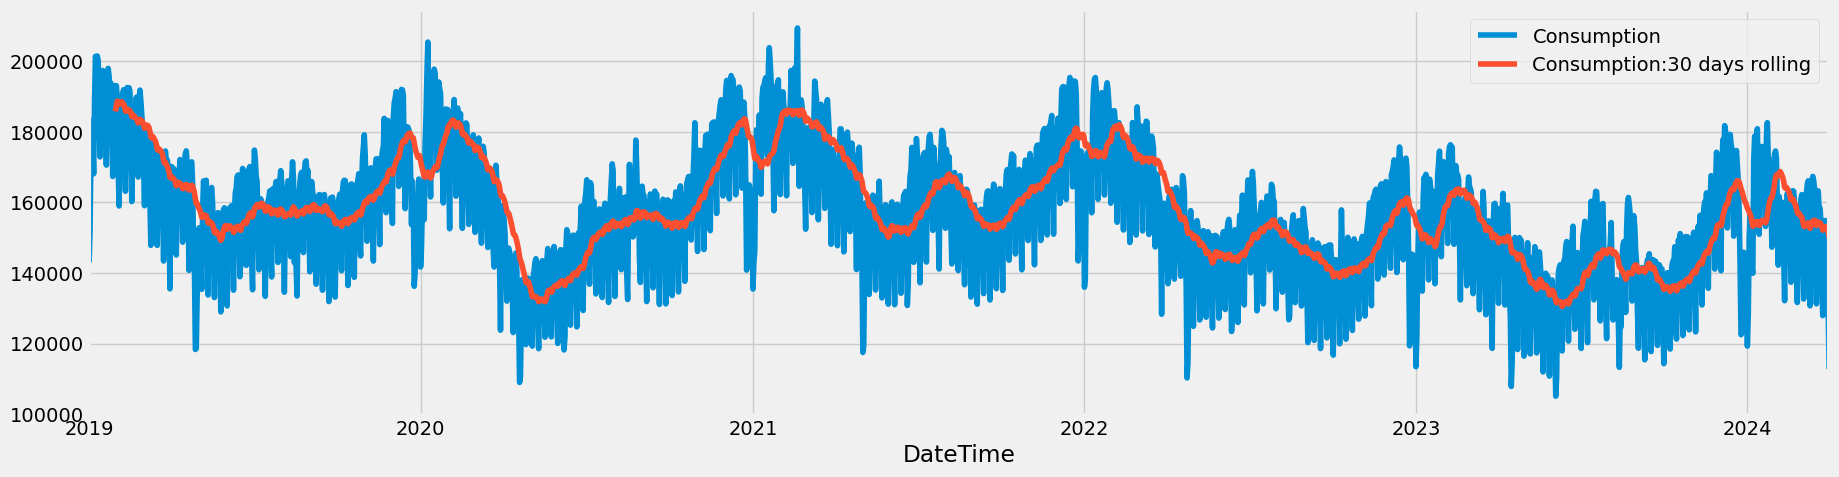

In [39]:
pw_clean[['Consumption','Consumption:30 days rolling']].plot(figsize=(20,5));

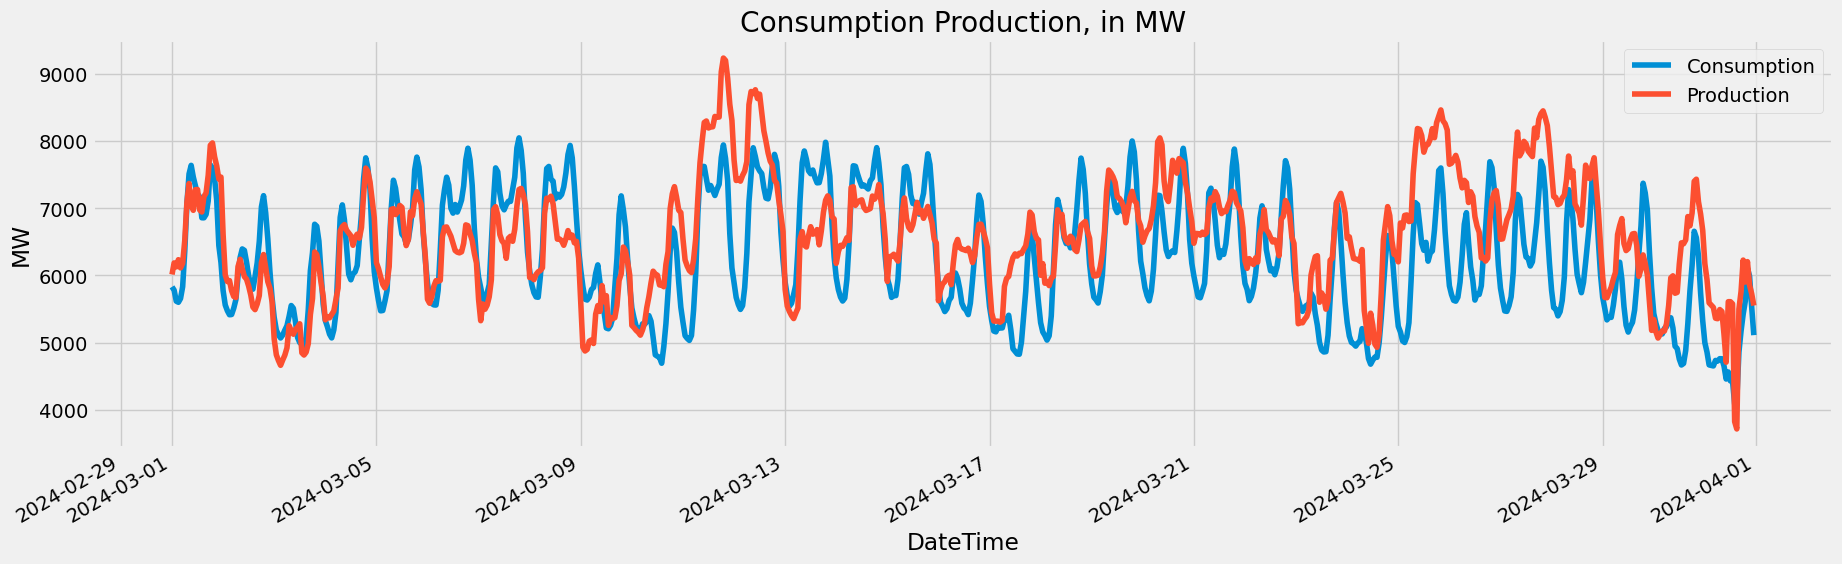

In [42]:
df2 = df.copy('Deep')
df2 = df2.set_index('DateTime')

dfSummer = df2[["Consumption", "Production"]]["2024-03-01 00:00:00" : "2024-04-01 23:59:59"]
dfSummer.plot(style="-", figsize=(20, 6), title=f"Consumption Production, in MW")
plt.ylabel('MW')
plt.show()

In [46]:
df1 = df.copy('Deep')
df1= df1.set_index('DateTime')

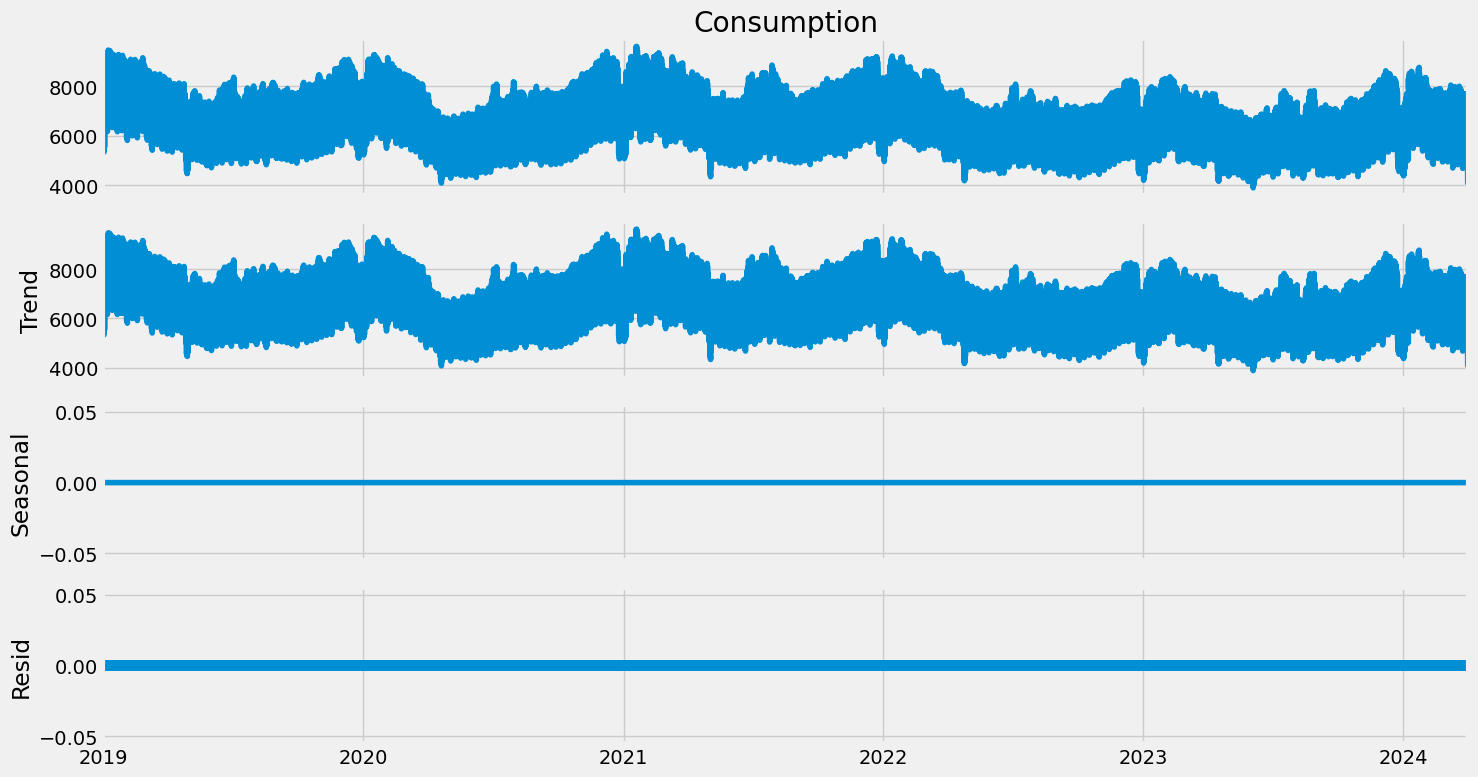

In [47]:
plt.rcParams["figure.figsize"] = (15,8)
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(df1['Consumption'], model='additive', period=1)
decomp.plot()
plt.show()

In [48]:
df_con = df.copy('deep')
df_con["DATE"] = pd.to_datetime(df_con["DateTime"]).dt.date
df_con["TIME"] = pd.to_datetime(df_con["DateTime"]).dt.time
df_con = df_con.set_index('DateTime')
df_con = df_con[["Consumption", "Production", "Solar","DATE" , "TIME"]]["2024-03-01 00:00:00" : "2024-03-30 23:59:59"]
df_con.head()

,Consumption,Production,Solar,DATE,TIME
DateTime,,,,,
2024-03-01 00:00:00,5830,6014,0,2024-03-01,00:00:00
2024-03-01 01:00:00,5780,6186,0,2024-03-01,01:00:00
2024-03-01 02:00:00,5617,6127,0,2024-03-01,02:00:00
2024-03-01 03:00:00,5600,6234,0,2024-03-01,03:00:00
2024-03-01 04:00:00,5656,6112,0,2024-03-01,04:00:00


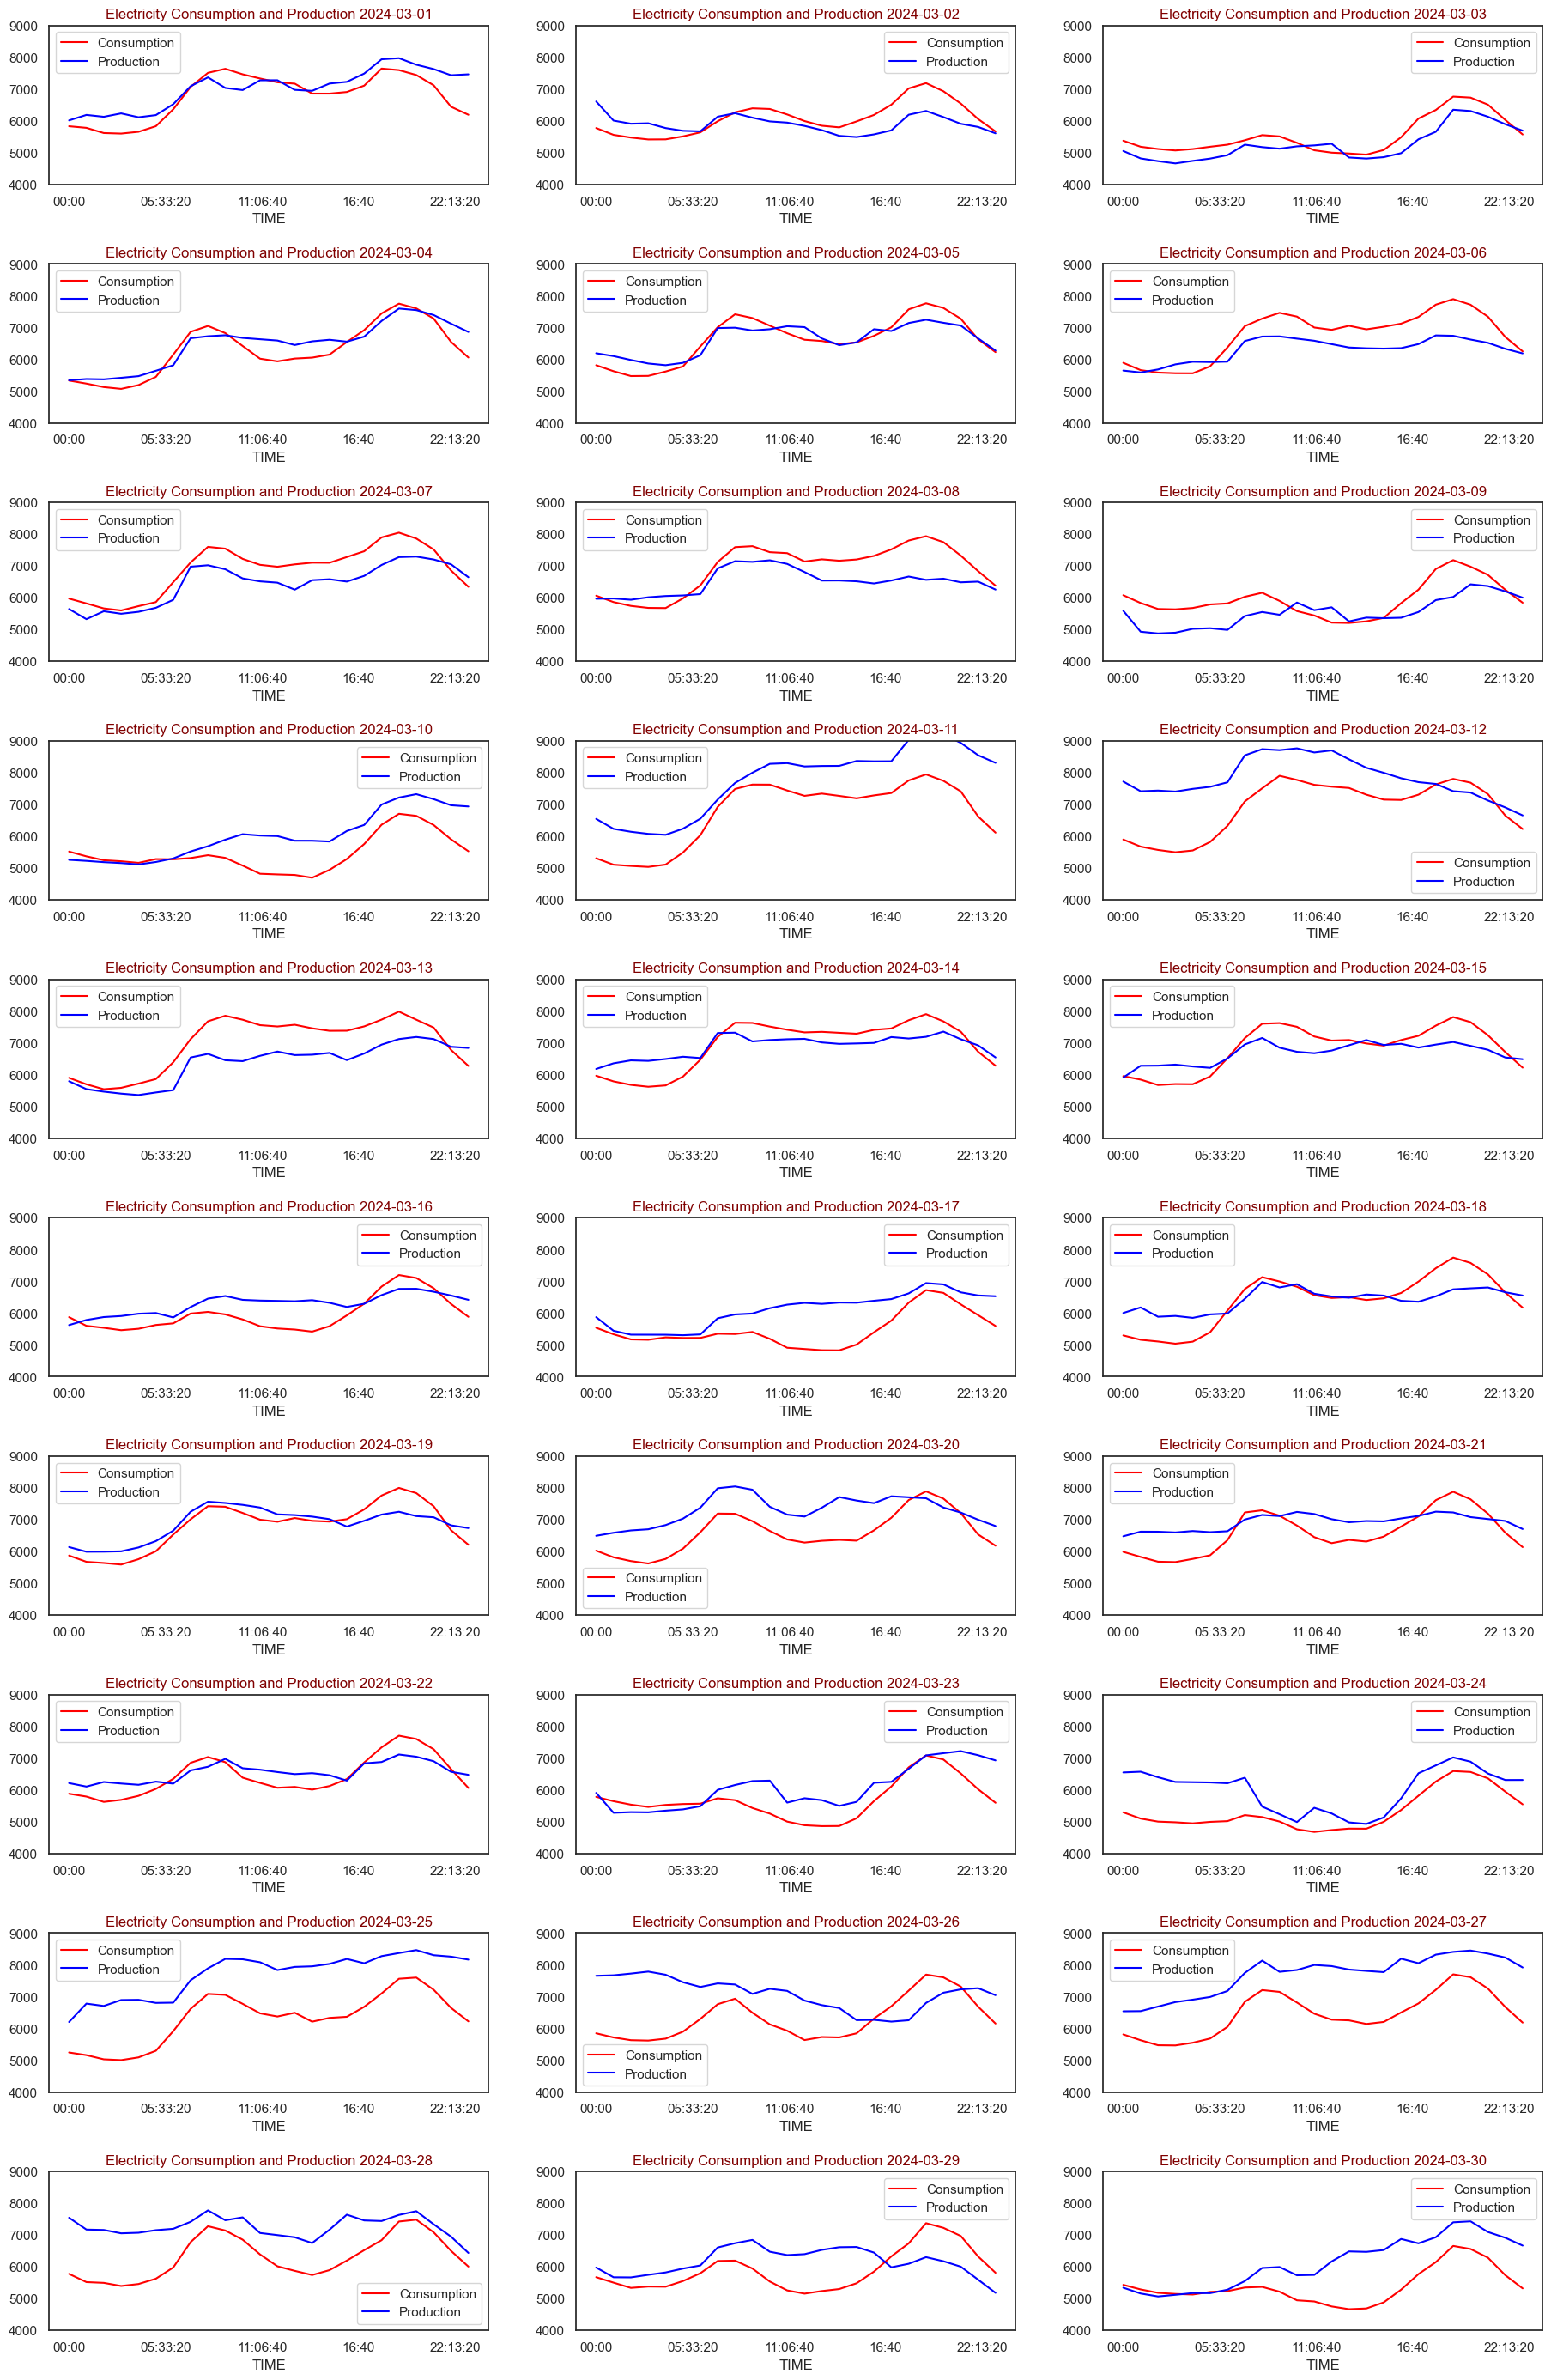

<Figure size 1500x800 with 0 Axes>

In [49]:
sns.set_theme(style="white")
df_con_pro = df_con.pivot_table(values=['Consumption', 'Production'], index='TIME', columns='DATE')

def Daywise_plot(data=None, row=None, col=None, title='Electricity Consumption and Production', ylim_top=8000):
    """
    Plots timeseries data for each column in a grid layout.

    Args:
        data: A pandas DataFrame containing the timeseries data.
        row: Number of rows in the grid layout (optional).
        col: Number of columns in the grid layout (optional).
        title: Title for the overall plot (optional).
        ylim_top: Upper limit for the y-axis (optional, default: 8000).
    """
    cols = data.columns.levels[1]  # Get all column names

    # Create the figure with desired size
    gp = plt.figure(figsize=(20, 40))

    # Adjust spacing between subplots
    gp.subplots_adjust(wspace=0.2, hspace=0.5)

    for i in range(1, len(cols) + 1):
        ax = gp.add_subplot(row, col, i)
        data['Consumption', cols[i - 1]].plot(ax=ax, color='red', label='Consumption')
        data['Production', cols[i - 1]].plot(ax=ax, color='blue', label='Production')

        # Set title and y-axis limit for each subplot
        ax.set_title('{} {}'.format(title, cols[i - 1]), color='#800000')
        ax.set_ylim(4000, 9000)  # Update y-axis limit to 4000-8000
        ax.legend()  # Show legend

    # Display the plot
    plt.show()

# Call the function with desired parameters and new y-axis limit
Daywise_plot(data=df_con_pro, row=12, col=3, ylim_top=8000)
plt.tight_layout()
plt.show()

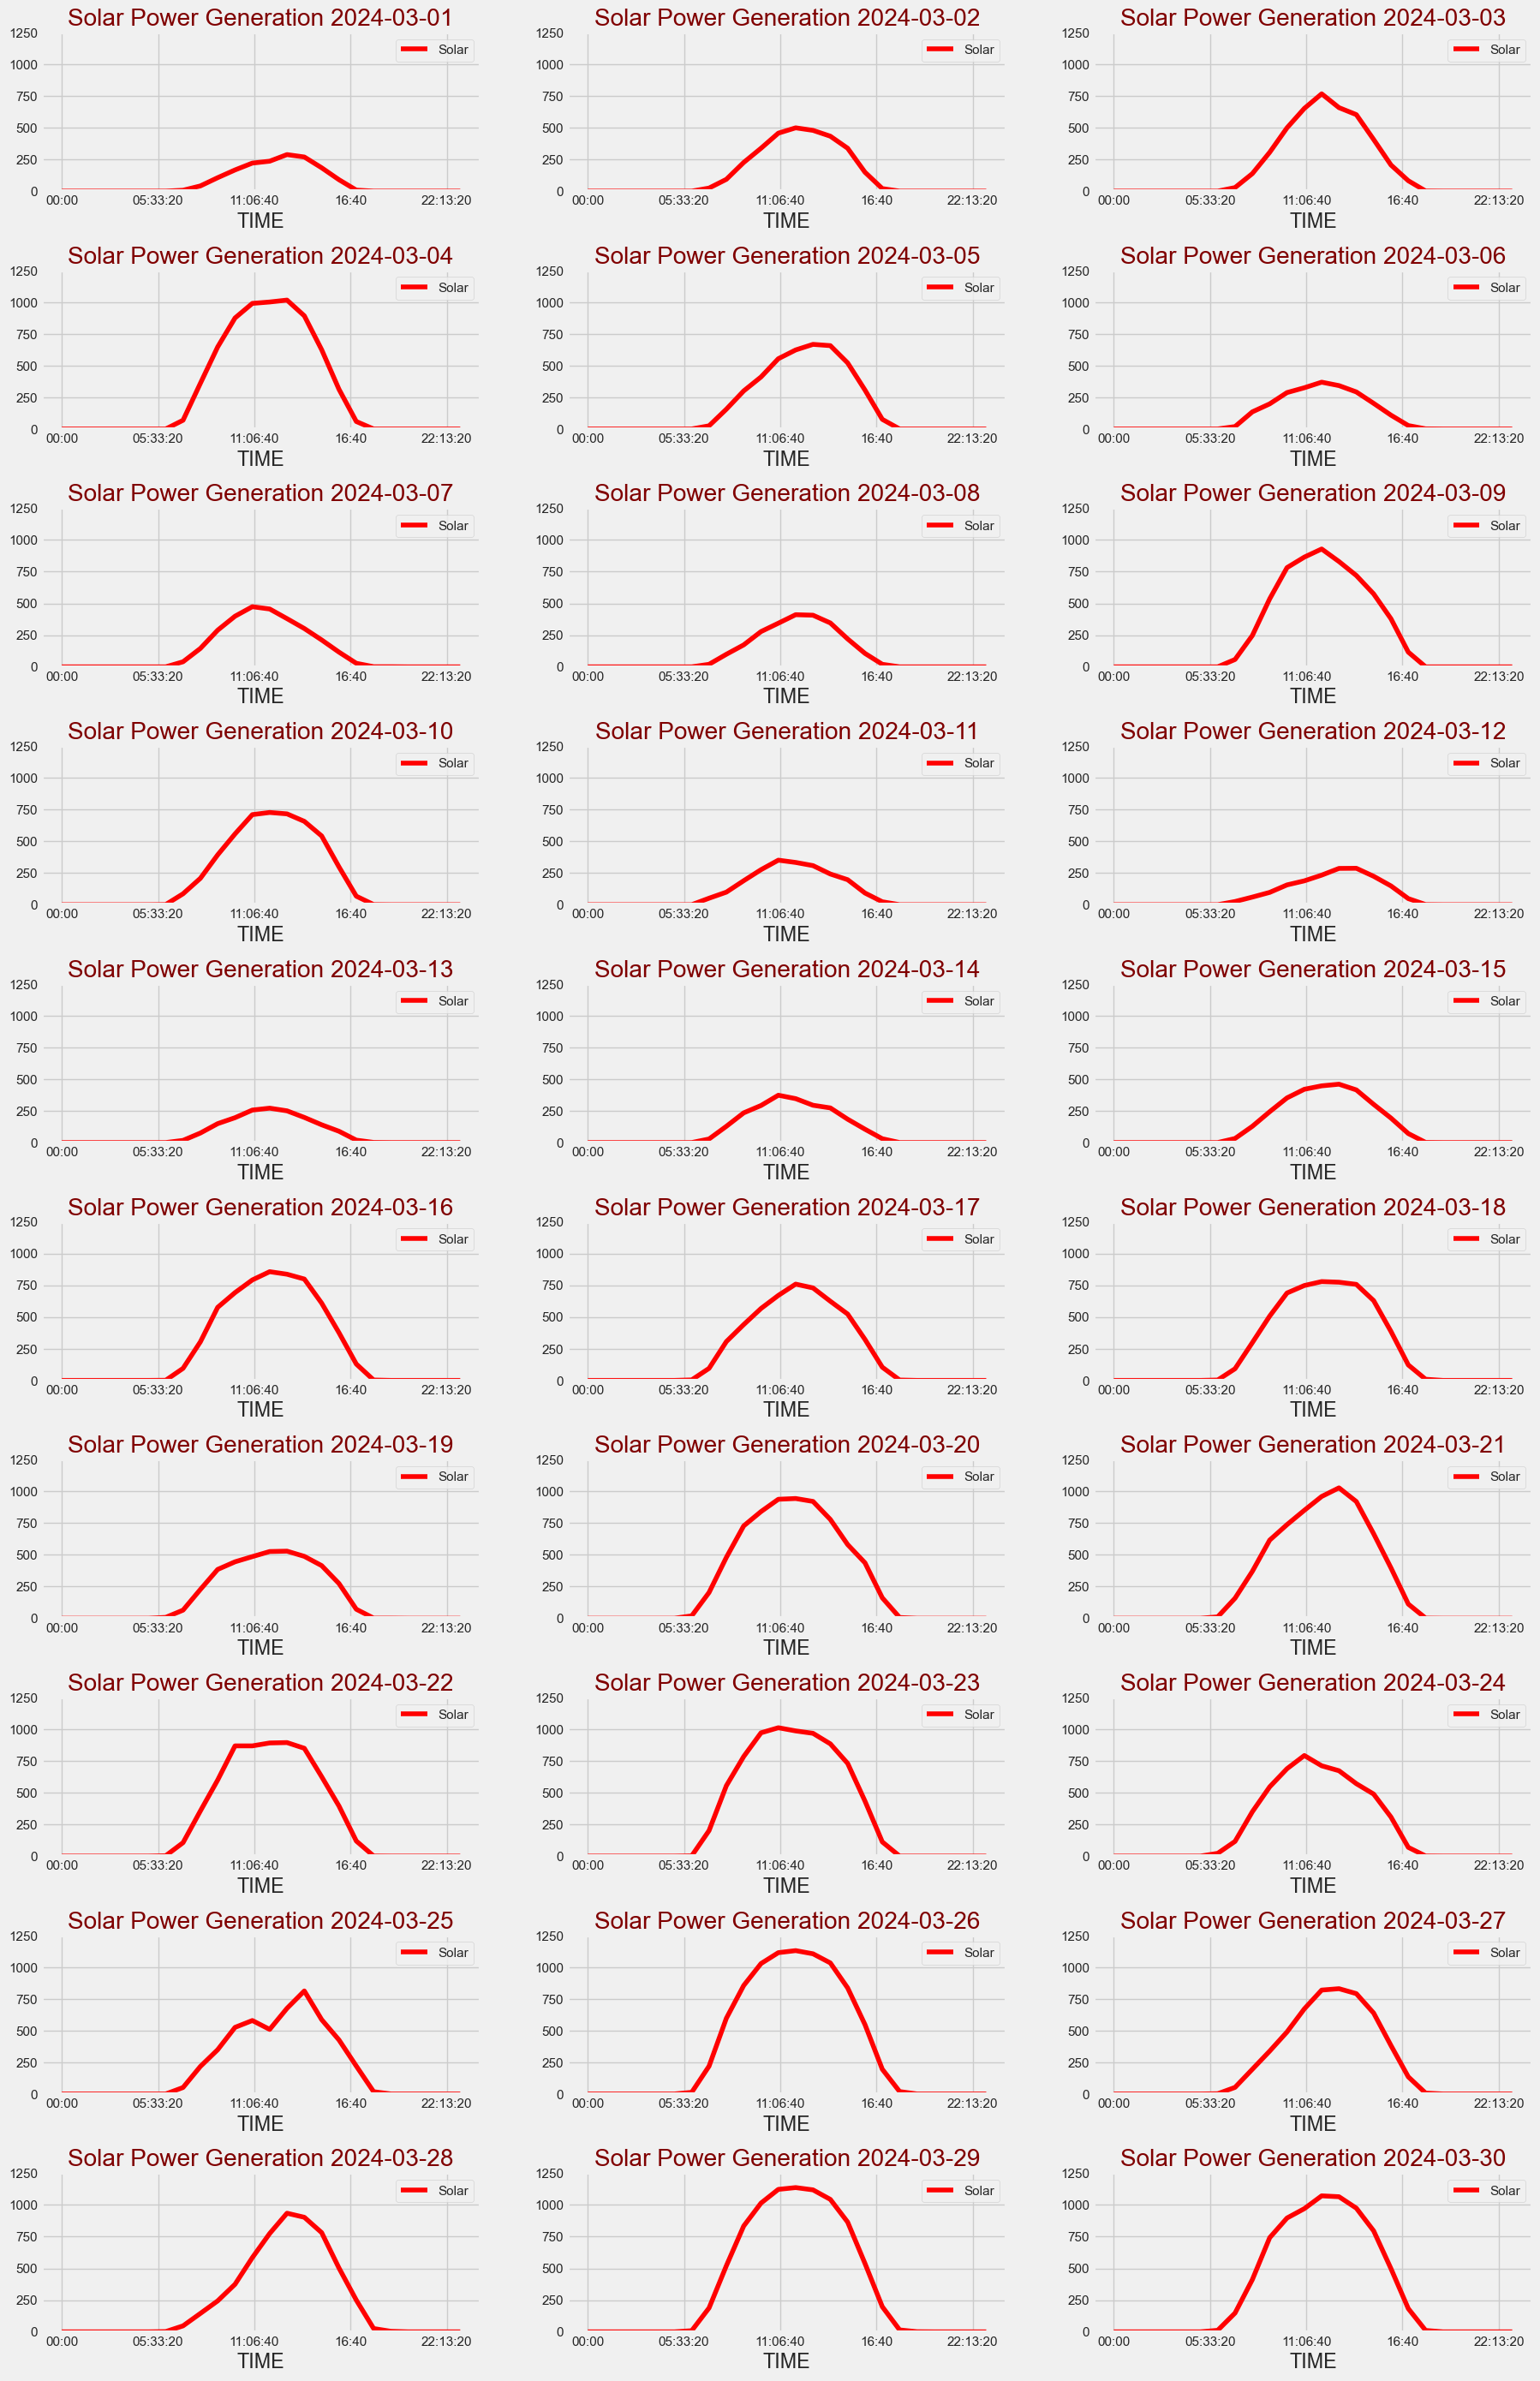

In [52]:
plt.style.use('fivethirtyeight')
df_con_pro = df_con.pivot_table(values=['Solar'], index='TIME', columns='DATE')

def Daywise_plot(data=None, row=None, col=None, title='Solar Power Generation', ylim_top=1000):
    """
    Plots timeseries data for each column in a grid layout.

    Args:
        data: A pandas DataFrame containing the timeseries data.
        row: Number of rows in the grid layout (optional).
        col: Number of columns in the grid layout (optional).
        title: Title for the overall plot (optional).
        ylim_top: Upper limit for the y-axis (optional, default: 8000).
    """
    cols = data.columns.levels[1]  # Get all column names

    # Create the figure with desired size
    gp = plt.figure(figsize=(20, 40))

    # Adjust spacing between subplots
    gp.subplots_adjust(wspace=0.2, hspace=0.5)

    for i in range(1, len(cols) + 1):
        ax = gp.add_subplot(row, col, i)
        data['Solar', cols[i - 1]].plot(ax=ax, color='red', label='Solar')
        
        # Set title and y-axis limit for each subplot
        ax.set_title('{} {}'.format(title, cols[i - 1]), color='#800000')
        ax.set_ylim(0, 1250)  # Update y-axis limit to 4000-8000
        ax.legend()  # Show legend

    # Display the plot
    plt.show()
    
# Call the function with desired parameters and new y-axis limit
Daywise_plot(data=df_con_pro, row=12, col=3, ylim_top=1000)

In [53]:
data = df.copy("deep")
data = data.set_index('DateTime')

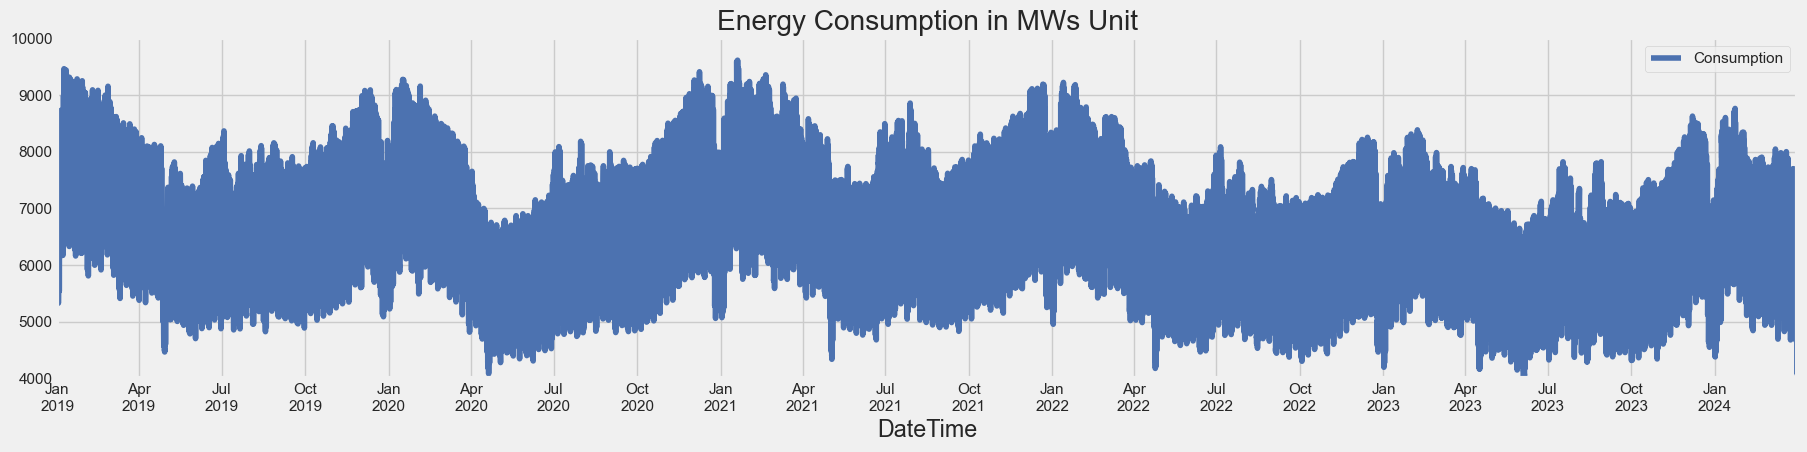

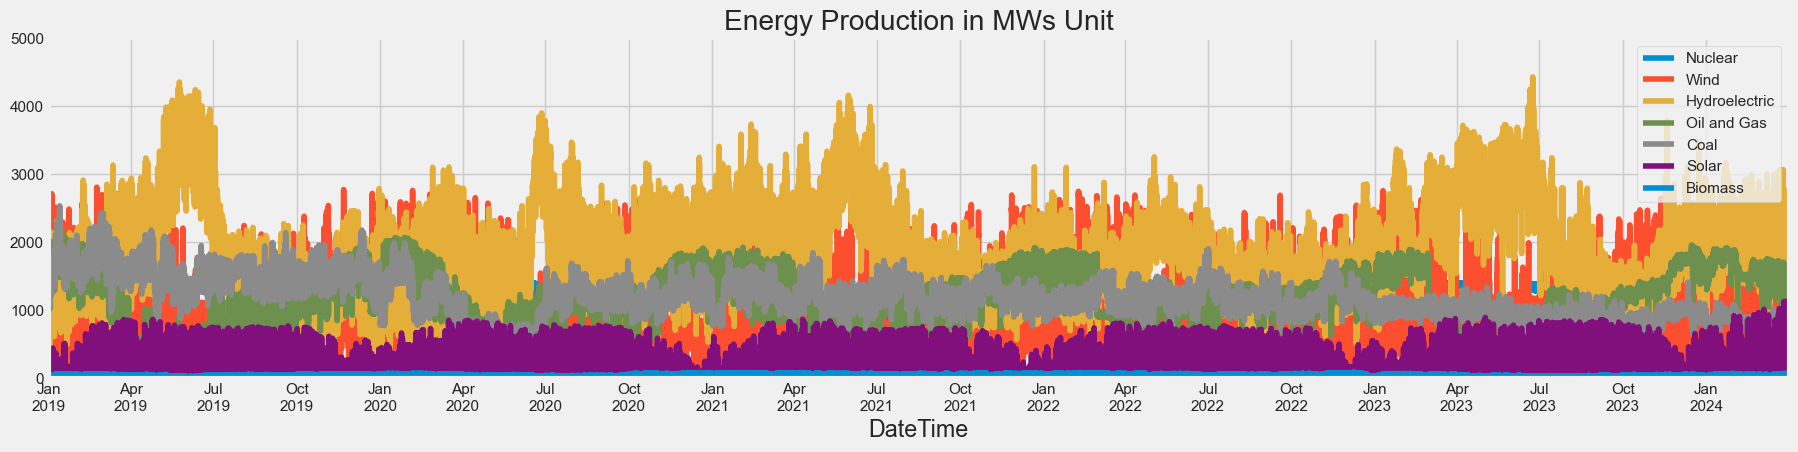

In [54]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

# Assuming your data is in a pandas DataFrame named 'data'

# Plot for Consumption
ax = data.plot(figsize=(20, 5), use_index=True, grid=True,
               y='Consumption',
               title='Energy Consumption in MWs Unit',
               ylim=([4000, 10000]),
               xlim=([data.index[0], data.index[-1]]),
               style='b-')

# Set x-axis labels with monthly formatting
ax.set_xticklabels(data.index, rotation=0, ha='center')
ax.xaxis.set_major_locator(MonthLocator(bymonth=(1, 4, 7, 10)))
ax.xaxis.set_major_formatter(DateFormatter('%b\n%Y'))

plt.show()

# Plot for Production (assuming 'Nuclear' etc. are columns in data)
ay = data.plot(figsize=(20, 5), use_index=True, grid=True,
               y=['Nuclear', 'Wind', 'Hydroelectric', 'Oil and Gas', 'Coal', 'Solar', 'Biomass'],
               title='Energy Production in MWs Unit',
               ylim=([0, 5000]),
               xlim=([data.index[0], data.index[-1]]))

# Set x-axis labels with monthly formatting
ay.set_xticklabels(data.index, rotation=0, ha='center')
ay.xaxis.set_major_locator(MonthLocator(bymonth=(1, 4, 7, 10)))
ay.xaxis.set_major_formatter(DateFormatter('%b\n%Y'))

plt.show()

In [55]:
df6 = df[['DateTime','Consumption','Production']]
df6 = df6.set_index('DateTime')
df6.head()

,Consumption,Production
DateTime,,
2019-01-01 00:00:00,6352,6527
2019-01-01 01:00:00,6116,5701
2019-01-01 02:00:00,5873,5676
2019-01-01 03:00:00,5682,5603
2019-01-01 04:00:00,5557,5454


In [69]:
df6['Day'] = df6.index.day
df6['Year'] = df6.index.year
df6['Month'] = df6.index.month_name()
df6['WeekDay'] = df6.index.day_name()
df6.head()

,Consumption,Production,Day,Year,Month,WeekDay
DateTime,,,,,,
2019-01-01 00:00:00,6352,6527,1,2019,January,Tuesday
2019-01-01 01:00:00,6116,5701,1,2019,January,Tuesday
2019-01-01 02:00:00,5873,5676,1,2019,January,Tuesday
2019-01-01 03:00:00,5682,5603,1,2019,January,Tuesday
2019-01-01 04:00:00,5557,5454,1,2019,January,Tuesday


In [67]:
dfbyMonth

,Consumption,Production,Day,Year
Month,,,,
April,6300.157500,6447.891389,15.500000,2021.000000
August,6353.122581,5897.455376,16.000000,2021.000000
December,7030.345161,7008.483065,16.000000,2021.000000
February,7165.422794,7275.392402,14.670588,2021.505882
January,7239.078629,7351.026434,16.000000,2021.500000
July,6487.788710,6266.634409,16.000000,2021.000000
June,6150.920278,6369.139722,15.500000,2021.000000
March,6779.522880,6771.992822,15.982952,2021.500000
May,5988.722581,6144.019355,16.000000,2021.000000


In [73]:
dfbyMonth = df6.drop('WeekDay',axis=1).groupby('Month').mean()
months_order=['January','February','March','April','May','June','July','August','September','October','November','December']
#dfbyMonth['month']=pd.Categorical(dfbyMonth['month'],categories=months_order,ordered=True)
dfbyMonth.head().sort_values('Month')

,Consumption,Production,Day,Year
Month,,,,
April,6300.157500,6447.891389,15.500000,2021.000000
August,6353.122581,5897.455376,16.000000,2021.000000
December,7030.345161,7008.483065,16.000000,2021.000000
February,7165.422794,7275.392402,14.670588,2021.505882
January,7239.078629,7351.026434,16.000000,2021.500000


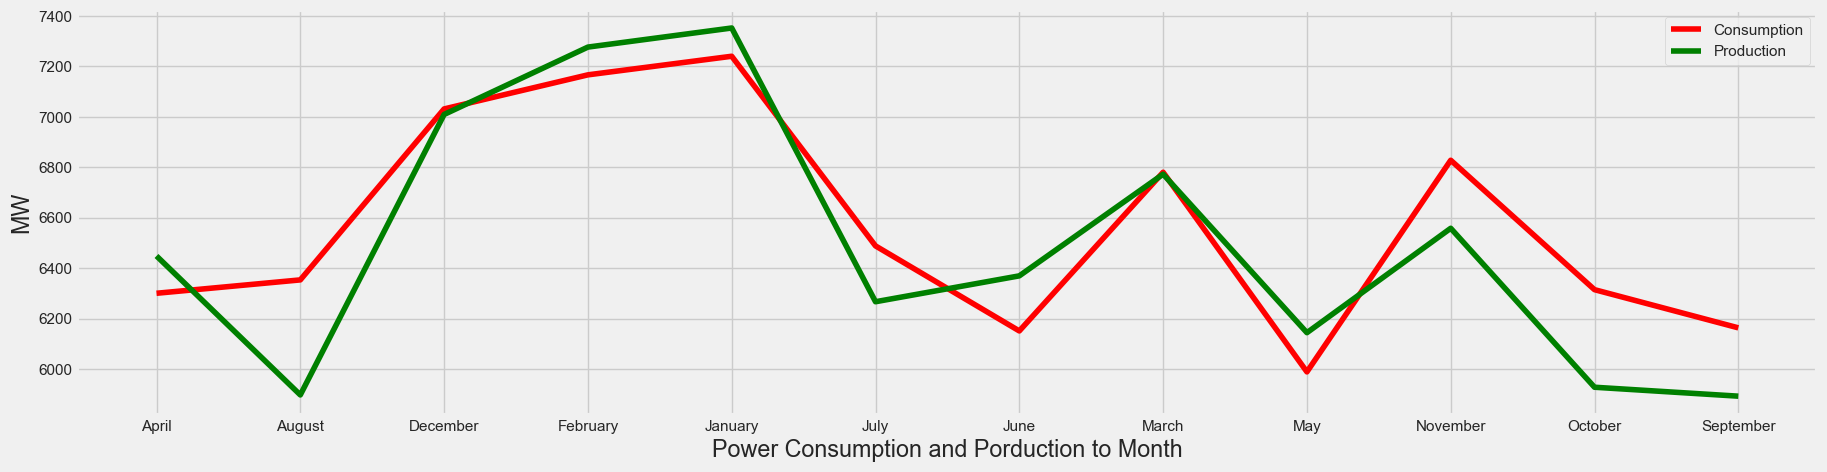

In [58]:
plt.figure(figsize=(20,5))
plt.plot(dfbyMonth.index, dfbyMonth['Consumption'], 'Red')
plt.plot(dfbyMonth.index, dfbyMonth['Production'], 'Green')
plt.xlabel('Power Consumption and Porduction to Month')
plt.ylabel('MW')
plt.legend(['Consumption','Production'])
plt.show()

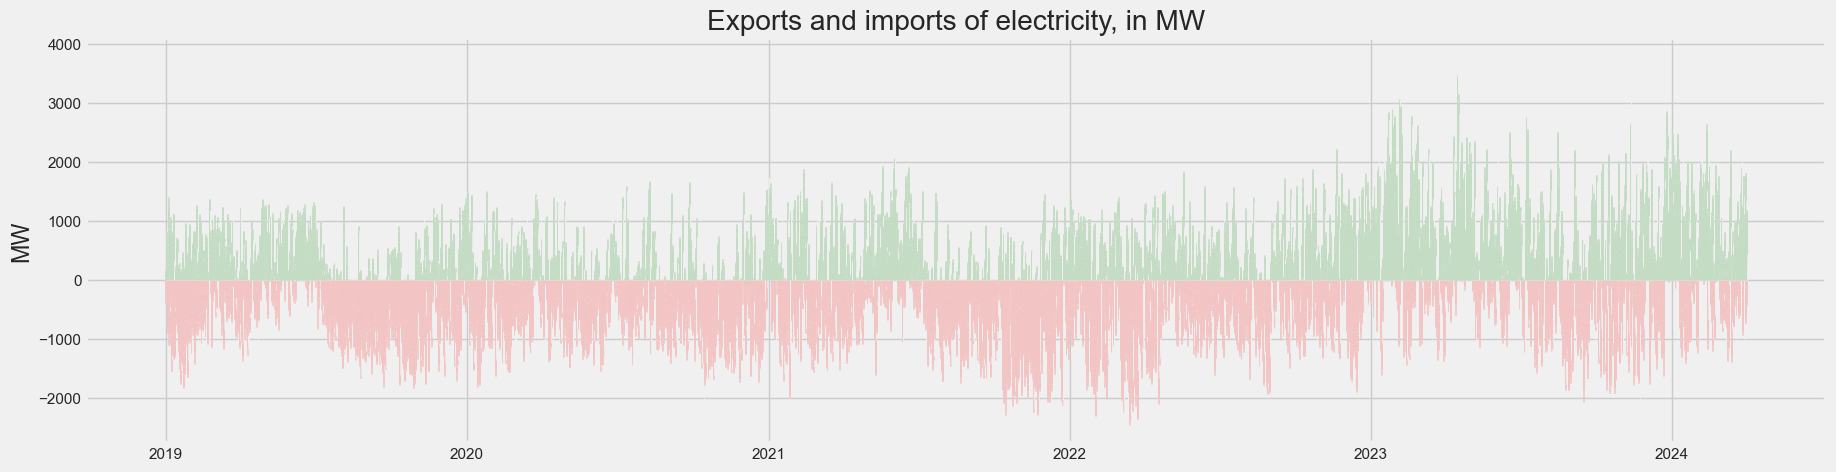

CPU times: total: 24.3 s
Wall time: 41 s


In [75]:
%%time
# add a new column for the delta
df6["delta"] = df6["Production"] - df6["Consumption"]

plt.rcParams["figure.figsize"] = (20,5)

plt.bar(
    df6.index, df6['delta'],
    color=np.where(df6['delta'] > 0, 'Green', 'Red')
)

plt.title("Exports and imports of electricity, in MW")
plt.ylabel('MW')
plt.show()

# drop the column we have used for the delta
df6.drop(["delta"], axis=1, inplace=True)

In [76]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [77]:
adf_test(df['Consumption'])

ADF Statistics: -13.888756674053797
p- value: 6.021844410251679e-26
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [78]:
df2.head()

,Consumption,Production,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar,Biomass
DateTime,,,,,,,,,
2019-01-01 00:00:00,6352,6527,1395,79,1383,1896,1744,0,30
2019-01-01 01:00:00,6116,5701,1393,96,1112,1429,1641,0,30
2019-01-01 02:00:00,5873,5676,1393,142,1030,1465,1616,0,30
2019-01-01 03:00:00,5682,5603,1397,191,972,1455,1558,0,30
2019-01-01 04:00:00,5557,5454,1393,159,960,1454,1458,0,30


In [79]:
# Computing Correlation Matrices
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats.stats import kendalltau

corr_p = df2[['Consumption', 'Nuclear','Wind','Hydroelectric','Oil and Gas','Coal', 'Solar']].corr(method='pearson')
print('Pearson correlation matrix')
print(corr_p)
print("\n")
corr_s = df2[['Consumption', 'Nuclear','Wind','Hydroelectric','Oil and Gas','Coal', 'Solar']].corr(method='spearman')
print('Spearman correlation matrix')
print(corr_s)

Pearson correlation matrix
               Consumption   Nuclear      Wind  Hydroelectric  Oil and Gas  \
Consumption       1.000000  0.127686  0.084838       0.293109     0.488928   
Nuclear           0.127686  1.000000  0.117266      -0.397854     0.267969   
Wind              0.084838  0.117266  1.000000      -0.179948     0.057779   
Hydroelectric     0.293109 -0.397854 -0.179948       1.000000    -0.204066   
Oil and Gas       0.488928  0.267969  0.057779      -0.204066     1.000000   
Coal              0.461929 -0.008739 -0.144778      -0.014163     0.201139   
Solar             0.126815 -0.128591 -0.118188       0.114974    -0.185649   

                   Coal     Solar  
Consumption    0.461929  0.126815  
Nuclear       -0.008739 -0.128591  
Wind          -0.144778 -0.118188  
Hydroelectric -0.014163  0.114974  
Oil and Gas    0.201139 -0.185649  
Coal           1.000000 -0.065995  
Solar         -0.065995  1.000000  


Spearman correlation matrix
               Consumption   N

In [80]:
corr_s

,Consumption,Nuclear,Wind,Hydroelectric,Oil and Gas,Coal,Solar
Consumption,1.000000,0.010770,0.058270,0.356474,0.467952,0.451607,0.254465
Nuclear,0.010770,1.000000,0.172758,-0.255939,0.225751,-0.084444,-0.316074
Wind,0.058270,0.172758,1.000000,-0.167174,0.051057,-0.154318,-0.126756
Hydroelectric,0.356474,-0.255939,-0.167174,1.000000,-0.112852,-0.022956,0.193792
Oil and Gas,0.467952,0.225751,0.051057,-0.112852,1.000000,0.178046,-0.160295
Coal,0.451607,-0.084444,-0.154318,-0.022956,0.178046,1.000000,-0.025976
Solar,0.254465,-0.316074,-0.126756,0.193792,-0.160295,-0.025976,1.000000


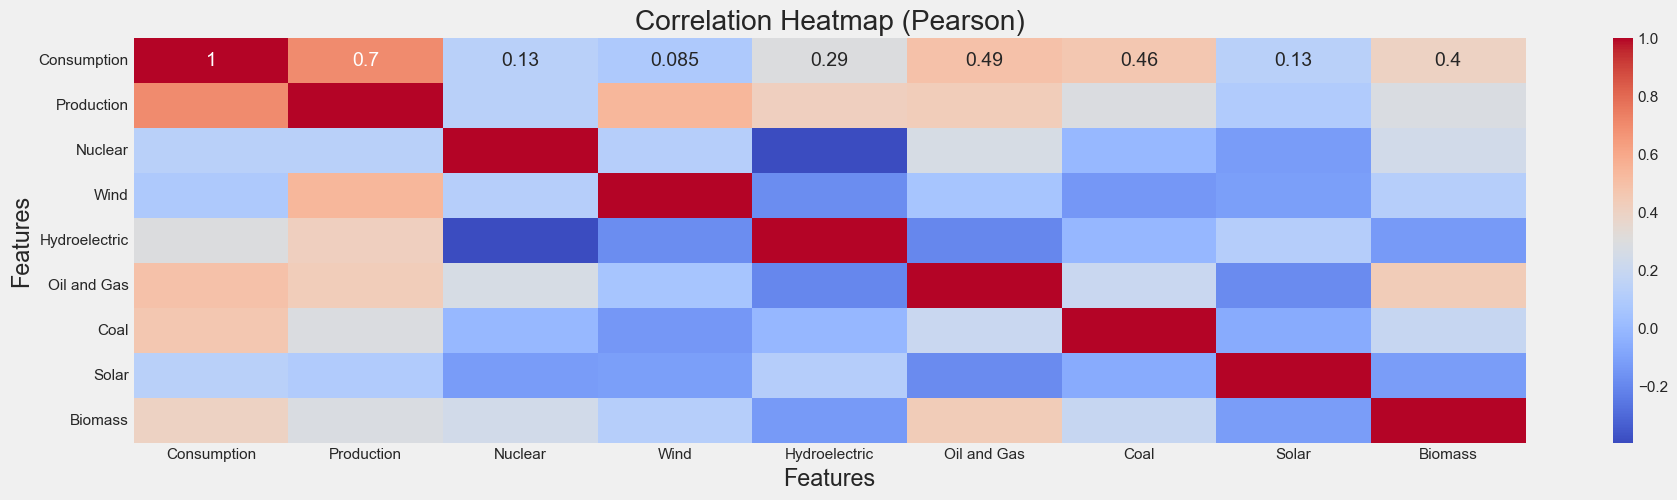

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df2.corr(method='pearson')

# Add annotation for correlation values
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')  # Adjust 'cmap' for color scheme

# Additional customizations (optional)
plt.title("Correlation Heatmap (Pearson)")
plt.xlabel("Features")
plt.ylabel("Features")

plt.show()

In [85]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


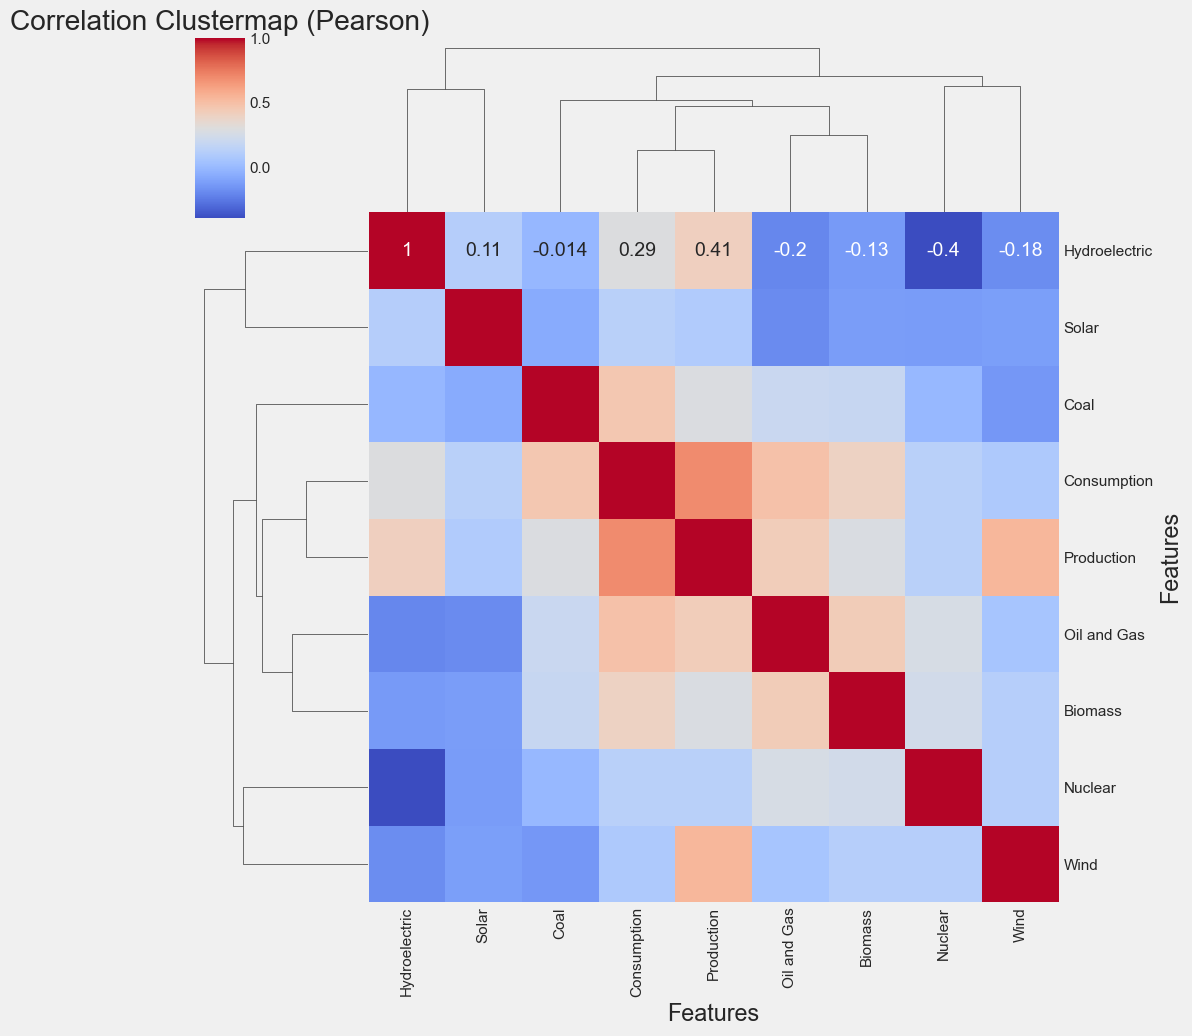

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_mat = df2.corr(method='pearson')

# Create a clustermap with annotations
g = sns.clustermap(corr_mat, annot=True, cmap='coolwarm')

# Add title and labels
plt.title("Correlation Clustermap (Pearson)")
g.ax_heatmap.set_xlabel("Features")
g.ax_heatmap.set_ylabel("Features")

plt.show()

In [88]:
monthly_data = df2.resample('M')['Consumption'].agg('mean')
monthly_data = monthly_data.reset_index()
df8 = monthly_data.set_index('DateTime')
df8.head()

,Consumption
DateTime,
2019-01-31,7752.168011
2019-02-28,7605.071429
2019-03-31,6992.792732
2019-04-30,6652.491667
2019-05-31,6379.282258


In [89]:
## Use Techniques Differencing
df8['Consumption First Difference']= df8['Consumption'] - df8['Consumption'].shift(1)
df8.head()

,Consumption,Consumption First Difference
DateTime,,
2019-01-31,7752.168011,NaN
2019-02-28,7605.071429,-147.096582
2019-03-31,6992.792732,-612.278696
2019-04-30,6652.491667,-340.301066
2019-05-31,6379.282258,-273.209409


In [90]:
adf_test(df8['Consumption First Difference'].dropna())

ADF Statistics: -2.1391167084981455
p- value: 0.22907913345776054
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [91]:
### 12 months shift
## Use Techniques Differencing
df8['Consumption 12 Difference']=df8['Consumption']-df8['Consumption'].shift(12)
df8.head()

,Consumption,Consumption First Difference,Consumption 12 Difference
DateTime,,,
2019-01-31,7752.168011,NaN,NaN
2019-02-28,7605.071429,-147.096582,NaN
2019-03-31,6992.792732,-612.278696,NaN
2019-04-30,6652.491667,-340.301066,NaN
2019-05-31,6379.282258,-273.209409,NaN


In [92]:
adf_test(df8['Consumption 12 Difference'].dropna()) 

ADF Statistics: -2.227906813736343
p- value: 0.19627322475129244
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


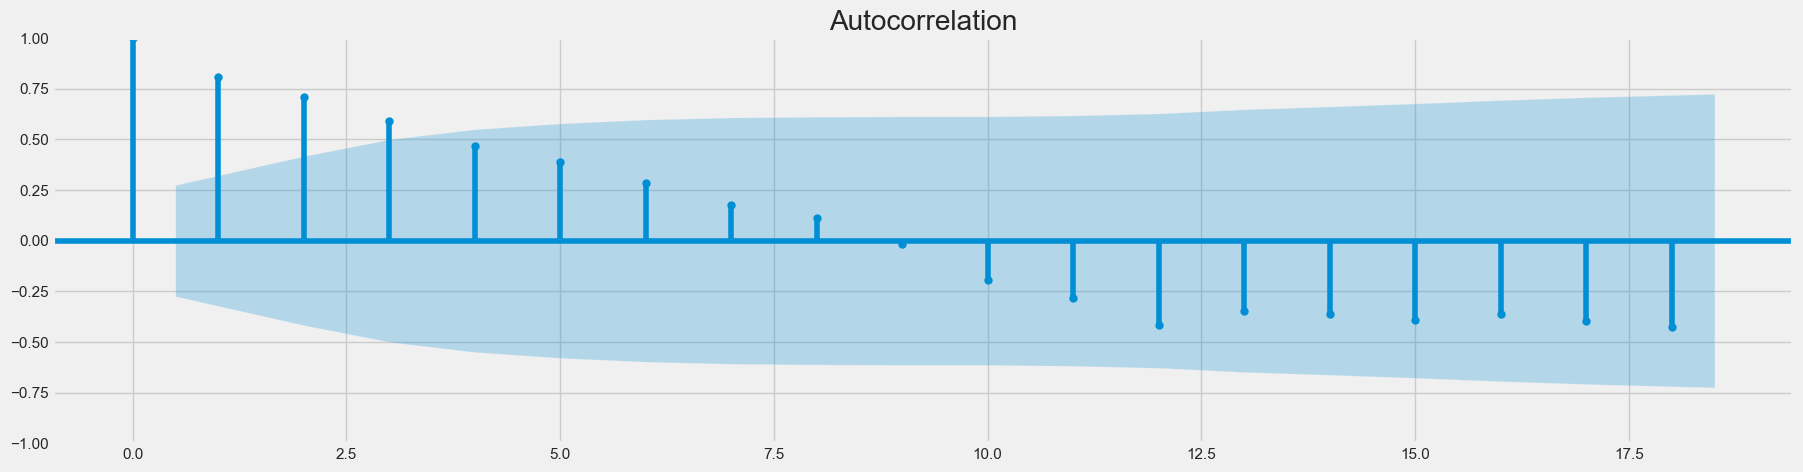

In [93]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
acf = plot_acf(df8['Consumption 12 Difference'].dropna())

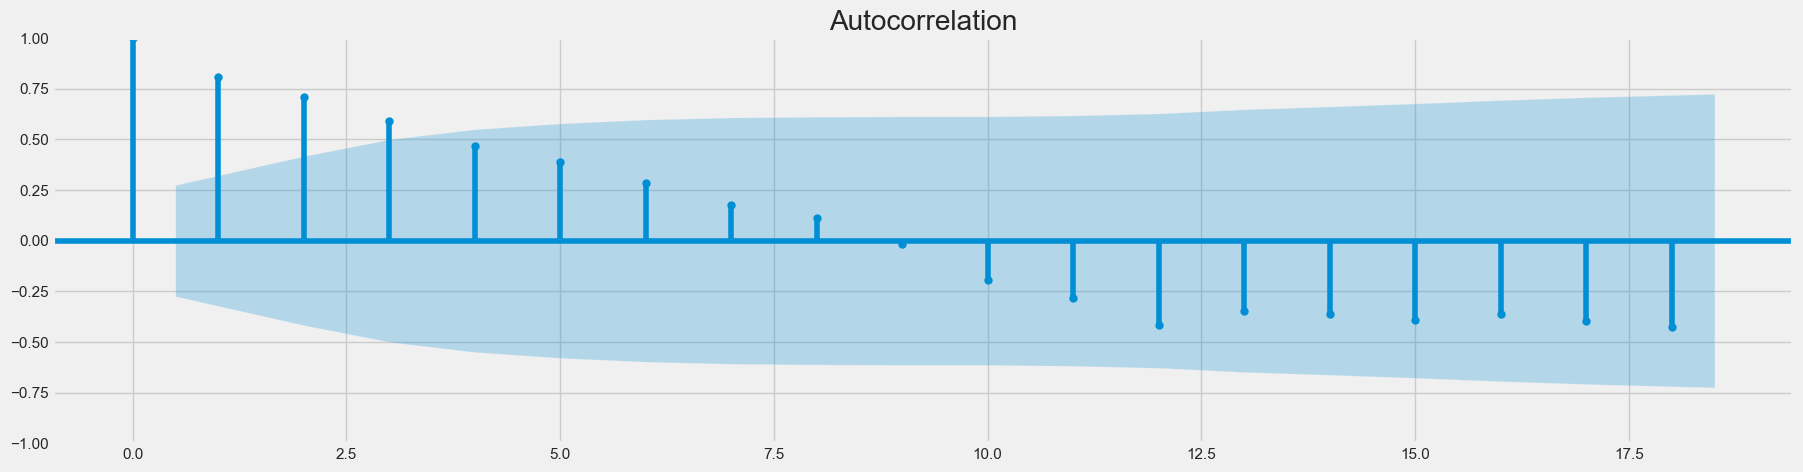

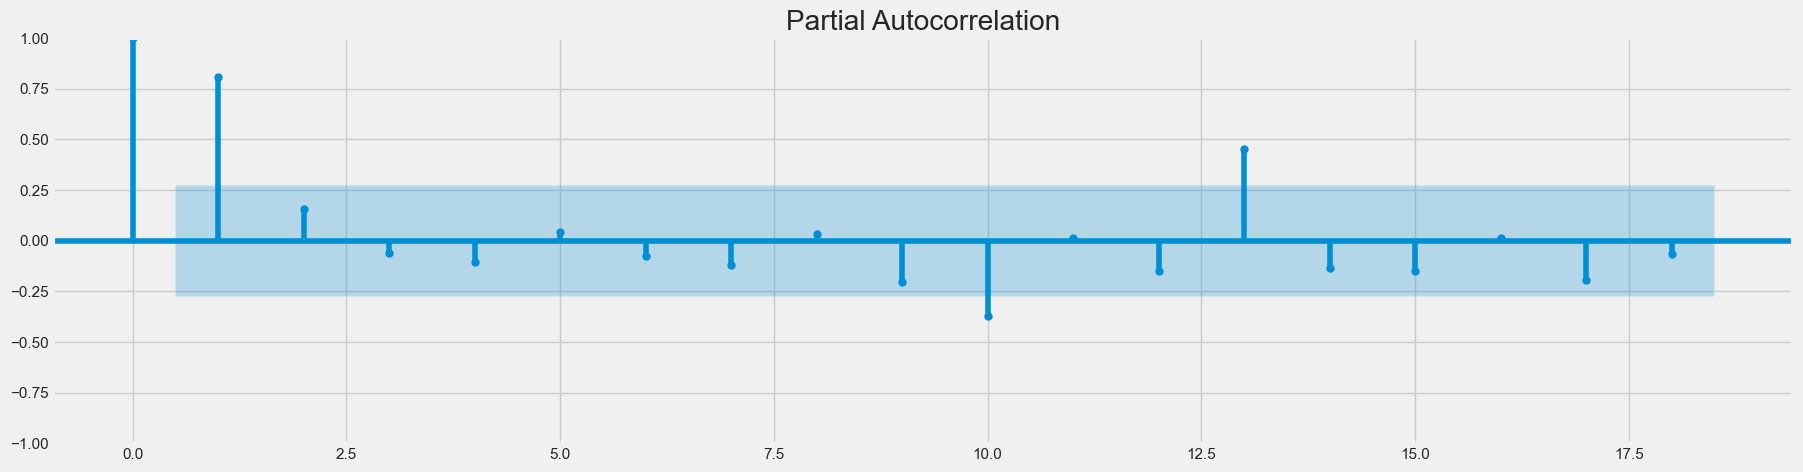

In [94]:
acf12 = plot_acf(df8['Consumption 12 Difference'].dropna())
pacf12 = plot_pacf(df8['Consumption 12 Difference'].dropna())

,Consumption,Consumption First Difference,Consumption 12 Difference,Consumption 2 Difference
DateTime,,,,
2019-01-31,7752.168011,NaN,NaN,NaN
2019-02-28,7605.071429,-147.096582,NaN,NaN
2019-03-31,6992.792732,-612.278696,NaN,-759.375279


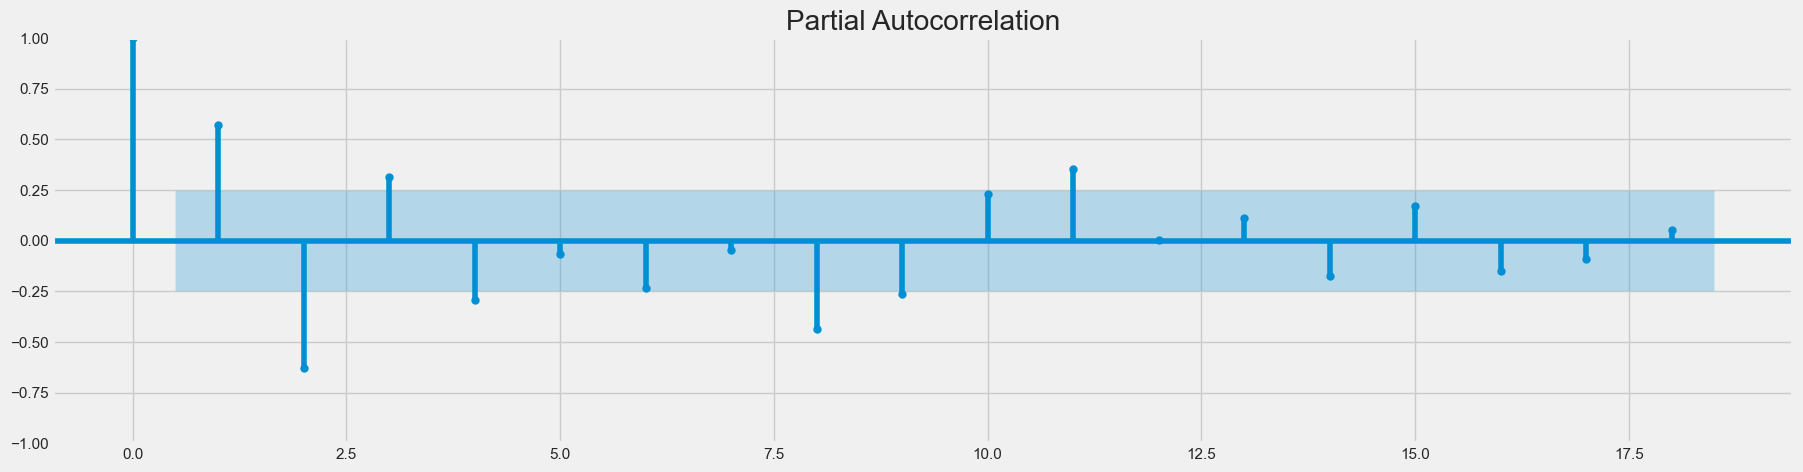

In [95]:
## Use Techniques Differencing
df8['Consumption 2 Difference']=df8['Consumption']-df8['Consumption'].shift(2)
display(df8.head(3))

result = plot_pacf(df8["Consumption 2 Difference"].dropna())

In [96]:
df9 = df8[['Consumption']]
df9.head()

,Consumption
DateTime,
2019-01-31,7752.168011
2019-02-28,7605.071429
2019-03-31,6992.792732
2019-04-30,6652.491667
2019-05-31,6379.282258


In [97]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2023,6,1)
test_dataset_end=datetime(2024,4,1)

In [98]:
train_data=df9[:train_dataset_end]
test_data=df9[train_dataset_end+timedelta(days=1):test_dataset_end]
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [99]:
train_data.head()

,Consumption
DateTime,
2019-01-31,7752.168011
2019-02-28,7605.071429
2019-03-31,6992.792732
2019-04-30,6652.491667
2019-05-31,6379.282258


In [100]:
test_data

,Consumption
DateTime,
2023-06-30,5651.966667
2023-07-31,6053.303763
2023-08-31,5929.065860
2023-09-30,5678.083333
2023-10-31,5758.722148
2023-11-30,6405.222222
2023-12-31,6623.670699
2024-01-31,6835.251344
2024-02-29,6478.412356


In [101]:
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.arima.model import ARIMA

model_ARIMA=ARIMA(train_data['Consumption'],order=(10,2,0))

In [102]:
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Consumption   No. Observations:                   53
Model:                ARIMA(10, 2, 0)   Log Likelihood                -354.065
Date:                Mon, 30 Dec 2024   AIC                            730.130
Time:                        13:01:58   BIC                            751.380
Sample:                    01-31-2019   HQIC                           738.250
                         - 05-31-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4212      0.103     -4.106      0.000      -0.622      -0.220
ar.L2         -0.4832      0.119     -4.059      0.000      -0.717      -0.250
ar.L3         -0.6502      0.110     -5.902      0.000      -0.866      -0.434
ar.L4         -0.5285      0.158     -3.340      0.001      -0.839      -0.218
ar.L5         -0.4232      0.132     -3.206      0.001      -0.682      -0.164
ar.L6         -0.5289      0.154     -3.445      0.001      -0.830      -0.228
ar.L7         -0.5321      0.153     -3.470      0.001      -0.833      -0.232
ar.L8         -0.3386      0.166     -2.040      0.041      -0.664      -0.013
ar.L9         -0.4163      0.112     -3.734      0.000      -0.635      -0.198
ar.L10        -0.6342      0.140     -4.545      0.000      -0.908      -0.361
sigma2       5.07e+04   1.35e+04      3.742      0.000    2.41e+04    7.73e+04
===================================================================================
Ljung-Box (L1) (Q):                   3.17   Jarque-Bera (JB):                 0.40
Prob(Q):                              0.07   Prob(JB):                         0.82
Heteroskedasticity (H):               0.47   Skew:                            -0.15
Prob(H) (two-sided):                  0.13   Kurtosis:                         2.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [103]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2023-06-30 00:00:00
2024-03-31 00:00:00


In [104]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Consumption']-pred

In [105]:
pred.to_frame()

,predicted_mean
2023-06-30,5782.831737
2023-07-31,5941.126674
2023-08-31,5762.715472
2023-09-30,5442.810798
2023-10-31,5659.394799
2023-11-30,5859.491987
2023-12-31,5870.746576
2024-01-31,6003.583606
2024-02-29,5912.016477
2024-03-31,5778.777140


In [106]:
residuals.to_frame()

,0
DateTime,
2023-06-30,-130.865071
2023-07-31,112.177090
2023-08-31,166.350388
2023-09-30,235.272535
2023-10-31,99.327348
2023-11-30,545.730235
2023-12-31,752.924123
2024-01-31,831.667738
2024-02-29,566.395879


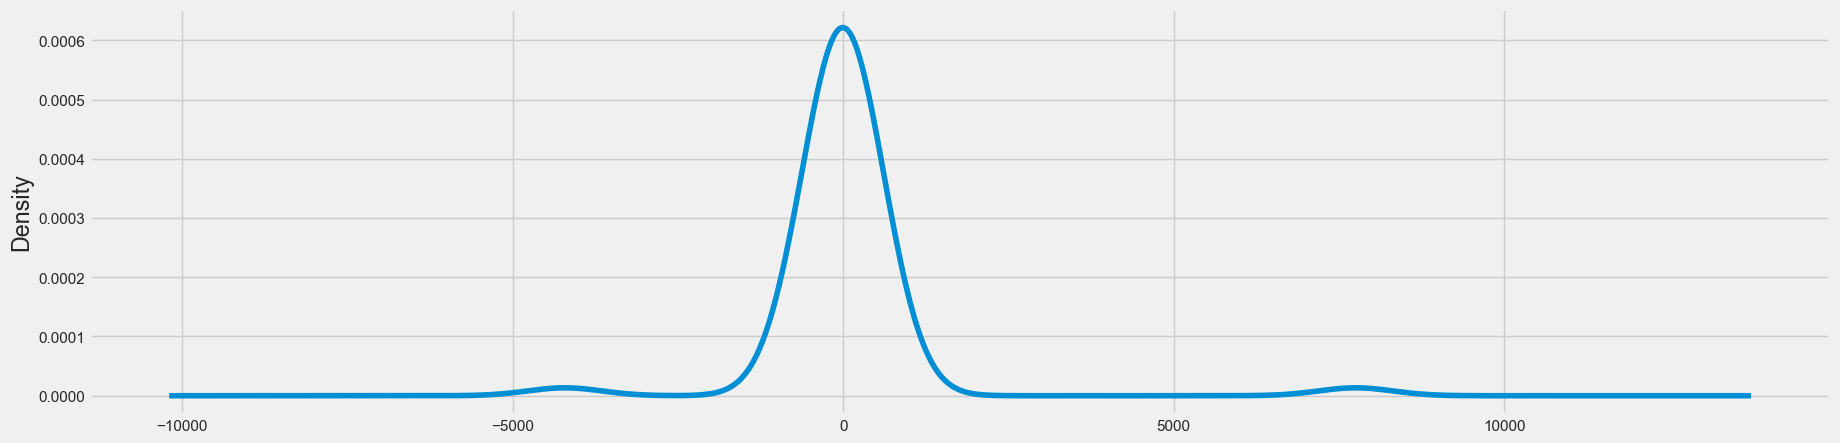

In [107]:
model_Arima_fit.resid.plot(kind='kde',figsize=(20,5));

In [108]:
test_data['Predicted_ARIMA']=pred

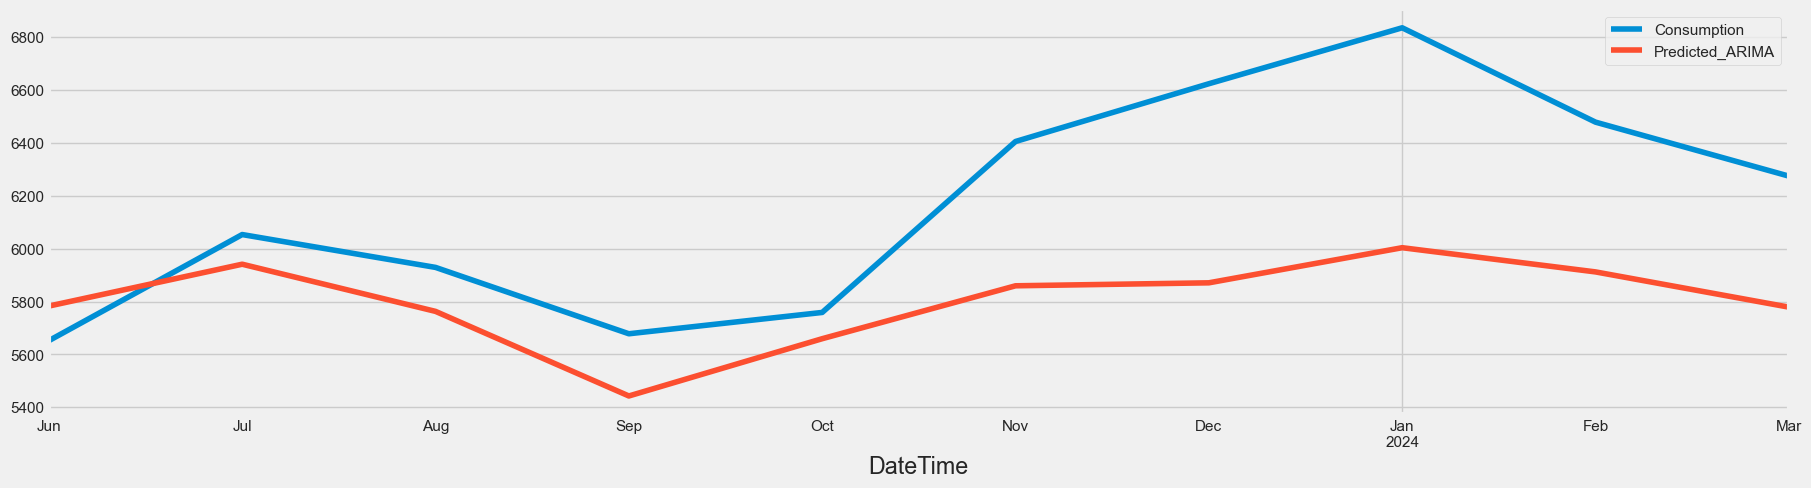

In [109]:
test_data[['Consumption','Predicted_ARIMA']].plot(figsize=(20,5));

In [110]:
## create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=SARIMAX(train_data['Consumption'],order=(3,0,5),seasonal_order=(0,1,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                         Consumption   No. Observations:                   53
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -291.015
Date:                             Mon, 30 Dec 2024   AIC                            600.030
Time:                                     13:06:39   BIC                            615.452
Sample:                                 01-31-2019   HQIC                           605.646
                                      - 05-31-2023                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5366      0.491      1.092      0.275      -0.426       1.499
ar.L2          0.5781      0.588      0.983      0.325      -0.574       1.730
ar.L3         -0.3799      0.226     -1.683      0.092      -0.822       0.062
ma.L1         -0.0188   2926.638  -6.42e-06      1.000   -5736.124    5736.086
ma.L2         -0.3426   3573.357  -9.59e-05      1.000   -7003.994    7003.309
ma.L3          0.8542    817.104      0.001      0.999   -1600.640    1602.349
ma.L4         -0.3221   1463.648     -0.000      1.000   -2869.019    2868.375
ma.L5         -0.5001      0.534     -0.937      0.349      -1.547       0.546
sigma2       5.58e+04      0.112   4.96e+05      0.000    5.58e+04    5.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   2.42   Jarque-Bera (JB):                 3.88
Prob(Q):                              0.12   Prob(JB):                         0.14
Heteroskedasticity (H):               1.33   Skew:                             0.63
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.97e+25. Standard errors may be unstable.
"""

In [111]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2023-06-30 00:00:00
2024-03-31 00:00:00


In [112]:
pred_Sarima=model_SARIMA_fit.predict(start=datetime(2023,6,1),end=datetime(2024,4,1))
residuals=test_data['Consumption']-pred_Sarima

In [113]:
test_data['Predicted_SARIMA']=pred_Sarima

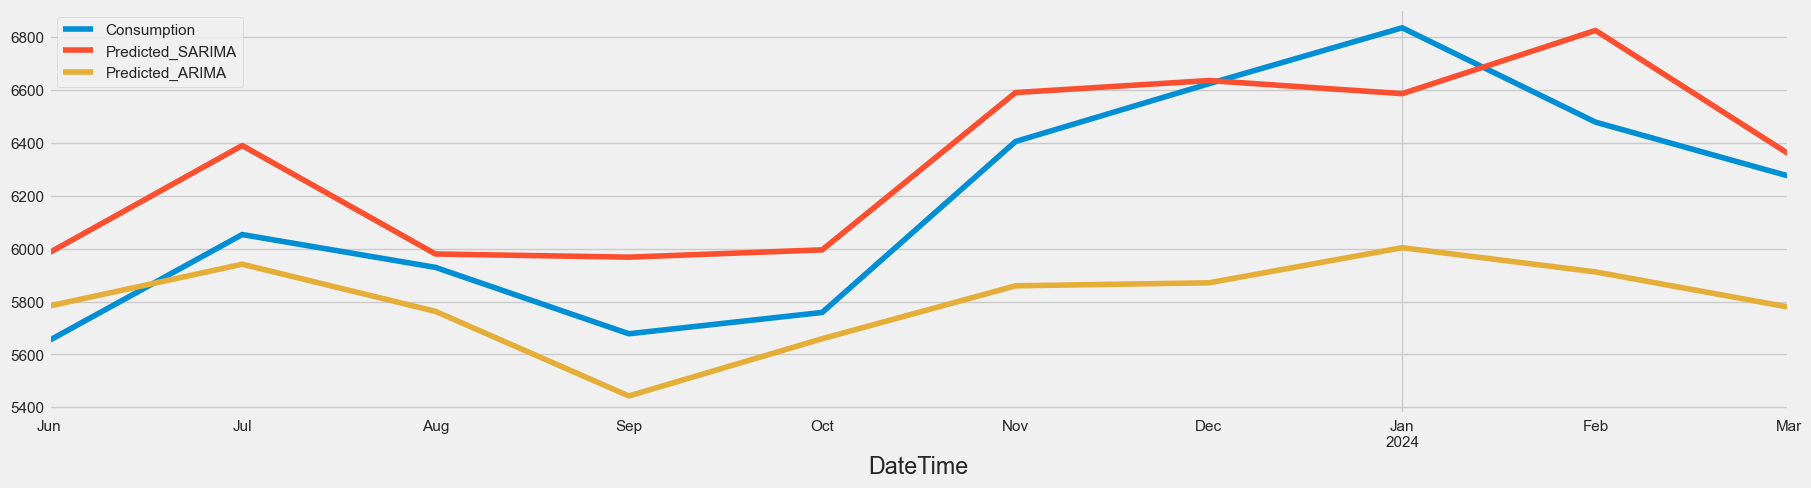

In [114]:
test_data[['Consumption','Predicted_SARIMA','Predicted_ARIMA']].plot(figsize=(20,5));